In [1]:
import os
os.chdir('/content/drive/MyDrive/Risk Analysis - Spring 2024_NEU')
print("We are currently in the folder of ", os.getcwd())

We are currently in the folder of  /content/drive/MyDrive/Risk Analysis - Spring 2024_NEU


In [5]:
pip install chart-studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.5 MB/s eta 0:00:00


In [7]:
pip install plotly

In [9]:
# Import our libraries we are going to use for our data analysis.
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Plotly visualizations
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)



# For oversampling Library (Dealing with Imbalanced Datasets)
from imblearn.over_sampling import SMOTE
from collections import Counter

# Other Libraries
import time


<h1 align="center"> Lending Club Loan Analysis </h1> <br>
![newplot.png](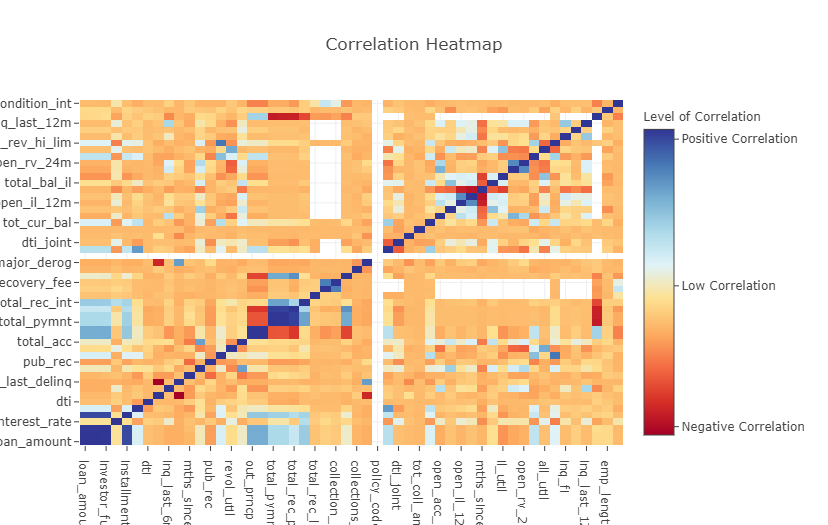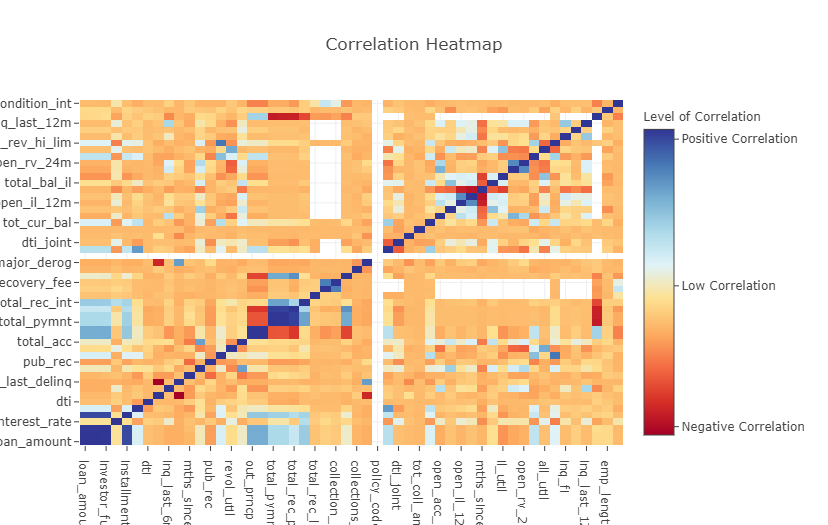)

## Company Information:
Lending Club is a  peer to peer lending company based in the United States, in which investors provide funds for potential borrowers and investors earn a profit depending on the risk they take (the borrowers credit score). Lending Club provides the "bridge" between investors and borrowers. For more basic information about the company please check out the wikipedia article about the company. <br><br>


<a src="https://en.wikipedia.org/wiki/Lending_Club"> Lending Club Information </a>




## How Lending Club Works?
<img src="http://echeck.org/wp-content/uploads/2016/12/Showing-how-the-lending-club-works-and-makes-money-1.png"><br><br>


## Outline: <br><br>
I. Introduction <br>
a) [General Information](#general_information)<br>
b) [Similar Distributions](#similar_distributions)<br><br>

II. <b>Good Loans vs Bad Loans</b><br>
a) [Types of Loans](#types_of_loans)<br>
b) [Loans issued by Region](#by_region)<br>
c) [A Deeper Look into Bad Loans](#deeper_bad_loans)<br><br>

III. <b>The Business Perspective</b><br>
a) [Understanding the Operative side of Business](#operative_side)<br>
b) [Analysis by Income Category](#income_category) <br><br>

IV. <b>Assesing Risks</b><br>
a) [Understanding the Risky Side of Business](#risky_side)<br>
b) [The importance of Credit Scores](#credit_scores)<br>
c) [What determines a bad loan](#determines_bad_loan)<br>
d) [Defaulted Loans](#defaulted_loans)
e) [Risks by Purposes](#loan_condition)

## References:
1) <a src="https://www.kaggle.com/arthurtok/global-religion-1945-2010-plotly-pandas-visuals"> Global Religion 1945-2010: Plotly & Pandas visuals</a> by Anisotropic <br>
2) <a src="https://www.kaggle.com/vigilanf/loan-metrics-by-state"> Loan Metrics By State </a> by Frank Vigilante<br>
3) Hands on Machine Learning by Aurélien Géron <br>
4) <a src="https://www.youtube.com/watch?v=oYbVFhK_olY&list=PLSPWNkAMSvv5DKeSVDbEbUKSsK4Z-GgiP"> Deep Learning with Neural Networks and TensorFlow </a> by Sentdex

# Introduction:
## General Information:
<a id="general_information"></a>

In [18]:
df = pd.read_csv("LendingClub Dataset/loan_data_2007_2014.csv", low_memory=False)
df.drop(columns= ["Unnamed: 0"], inplace=True)

# Copy of the dataframe
original_df = df.copy()

df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [20]:
# Replace the name of some columns
df = df.rename(columns={"loan_amnt": "loan_amount", "funded_amnt": "funded_amount", "funded_amnt_inv": "investor_funds",
                       "int_rate": "interest_rate", "annual_inc": "annual_income"})

# Drop irrelevant columns
df.drop(['id', 'member_id', 'emp_title', 'url', 'desc', 'zip_code', 'title'], axis=1, inplace=True)
df.head()

,loan_amount,funded_amount,investor_funds,term,interest_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Similar Distributions:
<a id="similar_distributions"></a>
We will start by exploring the distribution of the loan amounts and see when did the loan amount issued increased significantly. <br>

<h4> What we need to know: </h4> <br>
<ul>
<li> Understand what amount was <b>mostly issued</b> to borrowers. </li>
<li> Which <b>year</b> issued the most loans. </li>
<li> The distribution of loan amounts is a <b>multinomial distribution </b>.</li>
</ul>



<h4> Summary: </h4><br>
<ul>
<li> Most of the <b>loans issued</b> were in the range of 10,000 to 20,000 USD. </li>
<li> The <b>year of 2015</b> was the year were most loans were issued.</li>
<li> Loans were issued in an <b>incremental manner</b>. (Possible due to a recovery in the U.S economy) </li>
<li> The loans <b>applied</b> by potential borrowers, the amount <b>issued</b> to the borrowers and the amount <b>funded</b> by investors are similarly distributed, <b>meaning</b> that it is most likely that qualified borrowers are going to get the loan they had applied for. </li>

</ul>





<ipython-input-21-02ea1f61a22f>:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-21-02ea1f61a22f>:13: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-21-02ea1f61a22f>:15: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use

Text(0.5, 1.0, 'Total committed by Investors')

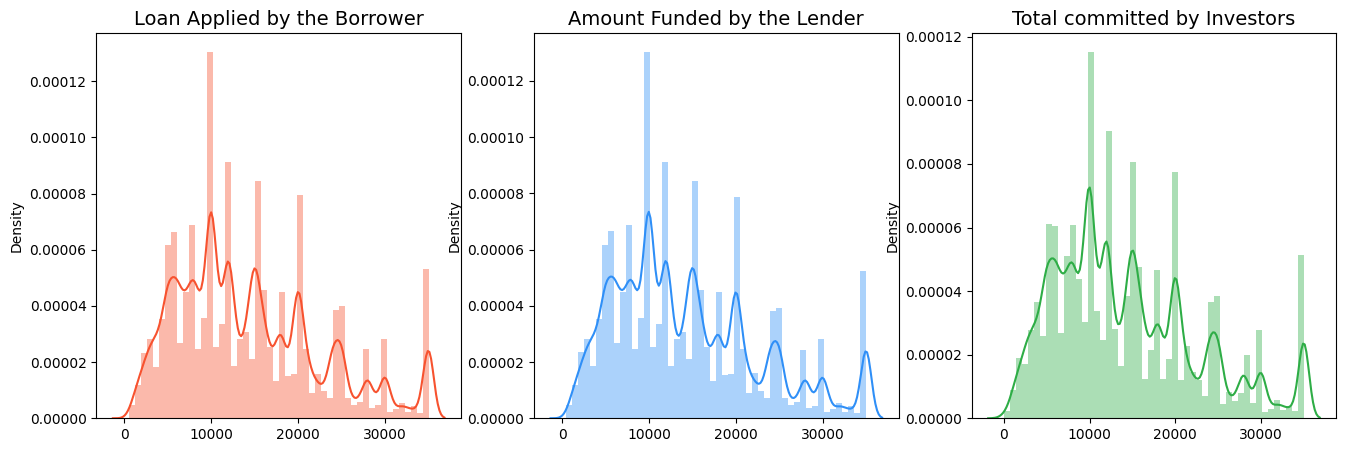

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))




loan_amount = df["loan_amount"].values
funded_amount = df["funded_amount"].values
investor_funds = df["investor_funds"].values


sns.distplot(loan_amount, ax=ax[0], color="#F7522F")
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.distplot(funded_amount, ax=ax[1], color="#2F8FF7")
ax[1].set_title("Amount Funded by the Lender", fontsize=14)
sns.distplot(investor_funds, ax=ax[2], color="#2EAD46")
ax[2].set_title("Total committed by Investors", fontsize=14)

In [37]:
try:
  # Assuming your dates are in '%d-%b-%Y' format
  df['dt_series'] = pd.to_datetime(df['issue_d'], format='%d-%b-%Y')
except ValueError:
  print("Error: Could not parse dates in 'issue_d' column. Please check the format.")
  pass

if 'dt_series' in df:  # Check if conversion was successful
  df['year'] = df['dt_series'].dt.year
  print(df['year'].head())  # Print the first few years

Error: Could not parse dates in 'issue_d' column. Please check the format.


In [38]:
# # The year of 2015 was the year where the highest amount of loans were issued
# # This is an indication that the economy is quietly recovering itself.
# plt.figure(figsize=(width=12, height=8))
# sns.barplot(x=df['issue_d'].dt.year(), y=df['loan_amount'], palette='tab10')
# plt.title('Issuance of Loans', fontsize=16)
# plt.xlabel('Year', fontsize=14)
# plt.ylabel('Average loan amount issued', fontsize=14)

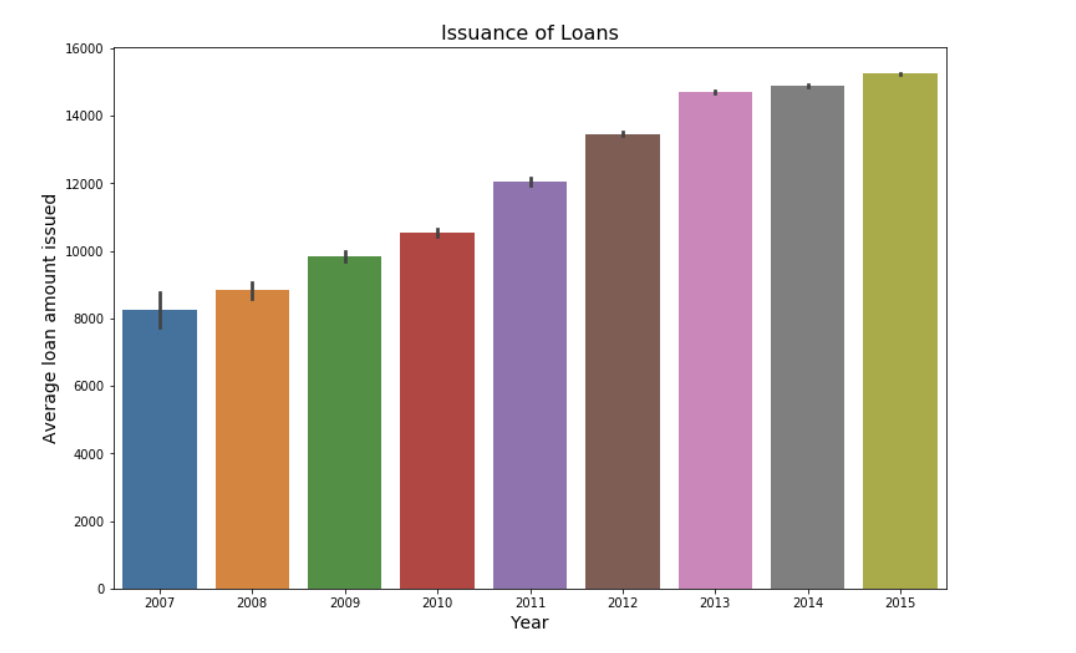

<h1 align="center"> Good Loans vs Bad Loans: </h1>
<h2>Types of Loans: </h2>
<a id="types_of_loans"></a>
<img src="http://strongarticle.com/wp-content/uploads/2017/09/1f42d6e77042d87f3bb6ae171ebbc530.jpg">
<br><br>
In this section, we will see what is the amount of bad loans Lending Club has declared so far, of course we have to understand that there are still loans that are at a risk of defaulting in the future.

<h4> What we need to know: </h4>
<ul>
<li> The amount of bad loans could <b>increment</b> as the days pass by, since we still have a great amount of current loans. </li>
<li> <b>Average annual income</b> is an important key metric for finding possible opportunities of investments in a specific region. </li>

</ul>

<h4> Summary: </h4>
<ul>
<li> Currently, <b>bad loans</b> consist 7.60% of total loans but remember that we still have <b>current loans</b> which have the risk of becoming bad loans. (So this percentage is subjected to possible changes.) </li>
<li> The <b> NorthEast </b> region seems to be the most attractive in term of funding loans to borrowers. </li>
<li> The <b> SouthWest </b> and <b> West</b> regions have experienced a slight increase in the "median income" in the past years. </li>
<li> <b>Average interest</b> rates have declined since 2012 but this might explain the <b>increase in the volume</b> of loans.  </li>
<li> <b>Employment Length</b> tends to be greater in the regions of the <b>SouthWest</b> and <b>West</b></li>
<li> Clients located in the regions of <b>NorthEast</b> and <b>MidWest</b> have not experienced a drastic increase in debt-to-income(dti) as compared to the other regions. </li>
</ul>

In [39]:
df["loan_status"].value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

In [40]:
# Determining the loans that are bad from loan_status column

bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period",
            "Late (16-30 days)", "Late (31-120 days)"]


df['loan_condition'] = np.nan

def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'


df['loan_condition'] = df['loan_status'].apply(loan_condition)

In [ ]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#3791D7", "#D72626"]
labels ="Good Loans", "Bad Loans"

plt.suptitle('Information on Loan Conditions', fontsize=20)

df["loan_condition"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors,
                                             labels=labels, fontsize=12, startangle=70)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#3791D7", "#E01E1B"]

sns.barplot(x="year", y="loan_amount", hue="loan_condition", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")

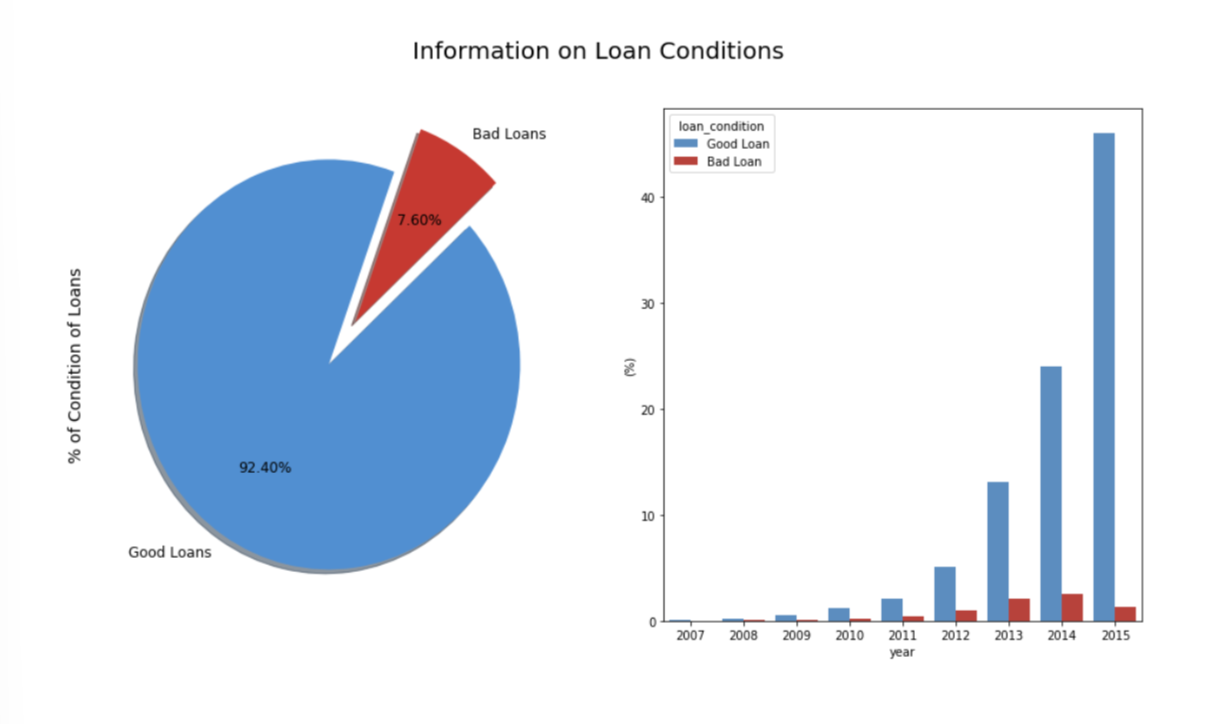

<h2> Loans Issued by Region</h2>
<a id="by_region"></a>
In this section we want to analyze loans issued by region in order to see region patters that will allow us to understand which region gives Lending Club.<br><br>

## Summary: <br>
<ul>
<li> <b> SouthEast</b> , <b>West </b> and <b>NorthEast</b> regions had the highest amount lof loans issued. </li>
<li> <b>West </b> and <b>SouthWest </b> had a rapid increase in debt-to-income starting in 2012. </li>
<li><b>West </b> and <b>SouthWest </b>  had a rapid decrease in interest rates (This might explain the increase in debt to income). </li>
</ul>

In [42]:
df['addr_state'].unique()

# Make a list with each of the regions by state.

west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']



df['region'] = np.nan

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'



df['region'] = df['addr_state'].apply(finding_regions)

In [ ]:
# This code will take the current date and transform it into a year-month format
df['complete_date'] = pd.to_datetime(df['issue_d'])

group_dates = df.groupby(['complete_date', 'region'], as_index=False).sum()

group_dates['issue_d'] = [month.to_period('M') for
                          month in group_dates['complete_date']]

group_dates = group_dates.groupby(['issue_d', 'region'], as_index=False).sum()
group_dates = group_dates.groupby(['issue_d', 'region'], as_index=False).sum()
group_dates['loan_amount'] = group_dates['loan_amount']/1000


df_dates = pd.DataFrame(data=group_dates[['issue_d','region','loan_amount']])

In [ ]:
plt.style.use('dark_background')
cmap = plt.cm.Set2

by_issued_amount = df_dates.groupby(['issue_d', 'region']).loan_amount.sum()
by_issued_amount.unstack().plot(stacked=False, colormap=cmap, grid=False, legend=True, figsize=(15,6))

plt.title('Loans issued by Region', fontsize=16)

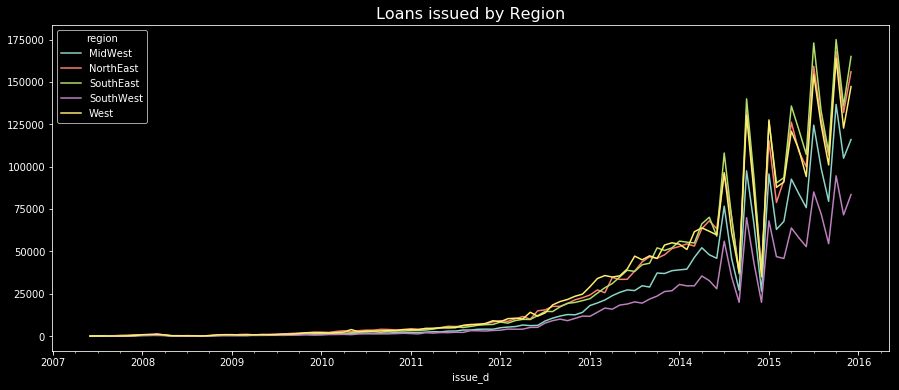

In [44]:
employment_length = ['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
                    '4 years', '5 years', '6 years', '2 years', '7 years', 'n/a']

# Create a new column and convert emp_length to integers.

lst = [df]
df['emp_length_int'] = np.nan

for col in lst:
    col.loc[col['emp_length'] == '10+ years', "emp_length_int"] = 10
    col.loc[col['emp_length'] == '9 years', "emp_length_int"] = 9
    col.loc[col['emp_length'] == '8 years', "emp_length_int"] = 8
    col.loc[col['emp_length'] == '7 years', "emp_length_int"] = 7
    col.loc[col['emp_length'] == '6 years', "emp_length_int"] = 6
    col.loc[col['emp_length'] == '5 years', "emp_length_int"] = 5
    col.loc[col['emp_length'] == '4 years', "emp_length_int"] = 4
    col.loc[col['emp_length'] == '3 years', "emp_length_int"] = 3
    col.loc[col['emp_length'] == '2 years', "emp_length_int"] = 2
    col.loc[col['emp_length'] == '1 year', "emp_length_int"] = 1
    col.loc[col['emp_length'] == '< 1 year', "emp_length_int"] = 0.5
    col.loc[col['emp_length'] == 'n/a', "emp_length_int"] = 0

In [ ]:
# Loan issued by Region and by Credit Score grade
# Change the colormap for tomorrow!

sns.set_style('whitegrid')

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
cmap = plt.cm.inferno

by_interest_rate = df.groupby(['year', 'region']).interest_rate.mean()
by_interest_rate.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax1, figsize=(16,12))
ax1.set_title('Average Interest Rate by Region', fontsize=14)


by_employment_length = df.groupby(['year', 'region']).emp_length_int.mean()
by_employment_length.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax2, figsize=(16,12))
ax2.set_title('Average Employment Length by Region', fontsize=14)
# plt.xlabel('Year of Issuance', fontsize=14)

by_dti = df.groupby(['year', 'region']).dti.mean()
by_dti.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax3, figsize=(16,12))
ax3.set_title('Average Debt-to-Income by Region', fontsize=14)

by_income = df.groupby(['year', 'region']).annual_income.mean()
by_income.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, ax=ax4, figsize=(16,12))
ax4.set_title('Average Annual Income by Region', fontsize=14)
ax4.legend(bbox_to_anchor=(-1.0, -0.5, 1.8, 0.1), loc=10,prop={'size':12},
           ncol=5, mode="expand", borderaxespad=0.)

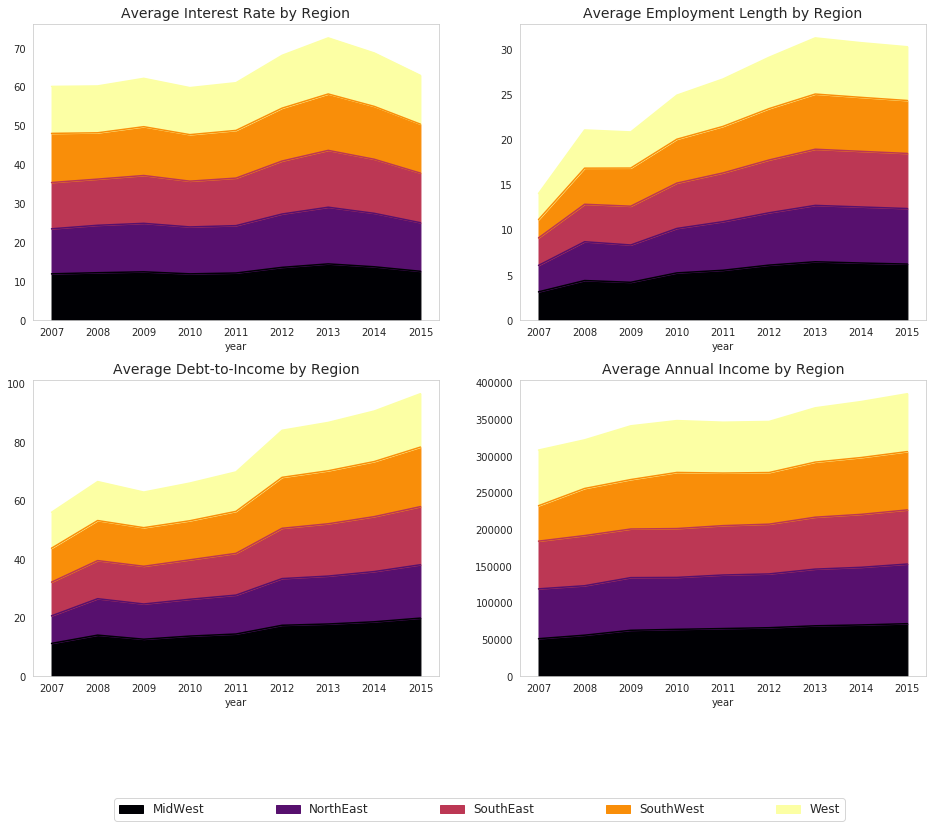

## A Deeper Look into Bad Loans:
<a id="deeper_bad_loans"></a>

<h4> What we need to know: </h4>
<ul>
<li>The number of loans that were classified as bad loans for each region by its <b>loan status</b>. (This will be shown in a dataframe below.)</li>
<li> This won't give us the exact reasons why a loan is categorized as a bad loan (other variables that might have influence the condition of the loan) but it will give us a <b> deeper insight on the level of risk </b> in a particular region. </li>
</ul>

<h4> Summary: </h4>
<ul>
<li>The regions of the <b> West </b> and <b> SouthEast </b> had a higher percentage in most of the b "bad" loan statuses.</li>
<li> The <b>NorthEast</b> region had a higher percentage in <b>Grace Period</b> and <b>Does not meet Credit Policy</b> loan status. However, both of these are not considered as bad as <b>default</b> for instance. </li>
<li> Based on this small and brief summary we can conclude that the <b>West</b> and <b>SouthEast</b> regions have the most undesirable loan status, but just by a slightly higher percentage compared to the <b>NorthEast</b> region. </li>
<li> Again, this does not tell us what causes a loan to be a <b> bad loan </b>, but it gives us some idea about <b>the level of risk</b> within the regions across the United States. </li>
</ul>

In [46]:
# We have 67429 loans categorized as bad loans
badloans_df = df.loc[df["loan_condition"] == "Bad Loan"]

# loan_status cross
loan_status_cross = pd.crosstab(badloans_df['region'], badloans_df['loan_status']).apply(lambda x: x/x.sum() * 100)
number_of_loanstatus = pd.crosstab(badloans_df['region'], badloans_df['loan_status'])


# Round our values
loan_status_cross['Charged Off'] = loan_status_cross['Charged Off'].apply(lambda x: round(x, 2))
loan_status_cross['Default'] = loan_status_cross['Default'].apply(lambda x: round(x, 2))
loan_status_cross['Does not meet the credit policy. Status:Charged Off'] = loan_status_cross['Does not meet the credit policy. Status:Charged Off'].apply(lambda x: round(x, 2))
loan_status_cross['In Grace Period'] = loan_status_cross['In Grace Period'].apply(lambda x: round(x, 2))
loan_status_cross['Late (16-30 days)'] = loan_status_cross['Late (16-30 days)'].apply(lambda x: round(x, 2))
loan_status_cross['Late (31-120 days)'] = loan_status_cross['Late (31-120 days)'].apply(lambda x: round(x, 2))


number_of_loanstatus['Total'] = number_of_loanstatus.sum(axis=1)
# number_of_badloans
number_of_loanstatus

loan_status,Charged Off,Default,Does not meet the credit policy. Status:Charged Off,In Grace Period,Late (16-30 days),Late (31-120 days),Total
region,,,,,,,
MidWest,6863,111,142,482,176,1092,8866
NorthEast,10090,191,190,857,317,1702,13347
SouthEast,10405,192,184,772,316,1754,13623
SouthWest,4449,119,79,371,137,812,5967
West,10668,219,166,664,272,1540,13529


In [47]:
charged_off = loan_status_cross['Charged Off'].values.tolist()
default = loan_status_cross['Default'].values.tolist()
not_meet_credit = loan_status_cross['Does not meet the credit policy. Status:Charged Off'].values.tolist()
grace_period = loan_status_cross['In Grace Period'].values.tolist()
short_pay = loan_status_cross['Late (16-30 days)'] .values.tolist()
long_pay = loan_status_cross['Late (31-120 days)'].values.tolist()



charged = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y= charged_off,
    name='Charged Off',
    marker=dict(
        color='rgb(192, 148, 246)'
    ),
    text = '%'
)

defaults = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y=default,
    name='Defaults',
    marker=dict(
        color='rgb(176, 26, 26)'
    ),
    text = '%'
)

credit_policy = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y= not_meet_credit,
    name='Does not meet Credit Policy',
    marker = dict(
        color='rgb(229, 121, 36)'
    ),
    text = '%'
)

grace = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y= grace_period,
    name='Grace Period',
    marker = dict(
        color='rgb(147, 147, 147)'
    ),
    text = '%'
)

short_pays = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y= short_pay,
    name='Late Payment (16-30 days)',
    marker = dict(
        color='rgb(246, 157, 135)'
    ),
    text = '%'
)

long_pays = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y= long_pay,
    name='Late Payment (31-120 days)',
    marker = dict(
        color = 'rgb(238, 76, 73)'
        ),
    text = '%'
)




data = [charged, defaults, credit_policy, grace, short_pays, long_pays]
layout = go.Layout(
    barmode='stack',
    title = '% of Bad Loan Status by Region',
    xaxis=dict(title='US Regions')
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='stacked-bar')

In [50]:
# Average interest rates clients pay
print(df['interest_rate'].mean())
# Average annual income of clients
print(df['annual_income'].mean())

13.829235939393294
73277.38147046522


<h1 align="center"> The Business Perspective </h1>
<h2 > Understanding the Operative Side of Business </h2>
<a id="operative_side"></a>
<img src="http://bestcredit.sg/wp-content/uploads/2017/07/licensed-money-lender.jpg"><br><br>
Now we will have a closer look at the <b> operative side </b> of business by state. This will give us a clearer idea in which state we have a higher operating activity. This will allow us to ask further questions such as Why do we have a higher level of operating activity in this state? Could it be because of economic factors? or the risk level is low and returns are fairly decent? Let's explore!

<h4> What we need to know: </h4>
<ul>
<li> We will focus on <b>three key metrics</b>: Loans issued by state (Total Sum), Average interest rates charged to customers and average annual income of all customers by state. </li>
<li> The purpose of this analysis is to see states that give high returns at a descent risk. </li>

</ul>

<h4> Summary: </h4>
<ul>
<li> <b>California, Texas, New York and Florida</b> are the states in which the highest amount of loans were issued. </li>
<li> Interesting enough, all four states have a approximate <b>interest rate of 13%</b> which is at the same level of the average interest rate for all states (13.24%) </li>
<li> California, Texas and New York are <b>all above the average annual income</b> (with the exclusion of Florida), this might give possible indication why most loans are issued in these states. </li>
</ul>

In [51]:
# Plotting by states

# Grouping by our metrics
# First Plotly Graph (We evaluate the operative side of the business)
by_loan_amount = df.groupby(['region','addr_state'], as_index=False).loan_amount.sum()
by_interest_rate = df.groupby(['region', 'addr_state'], as_index=False).interest_rate.mean()
by_income = df.groupby(['region', 'addr_state'], as_index=False).annual_income.mean()



# Take the values to a list for visualization purposes.
states = by_loan_amount['addr_state'].values.tolist()
average_loan_amounts = by_loan_amount['loan_amount'].values.tolist()
average_interest_rates = by_interest_rate['interest_rate'].values.tolist()
average_annual_income = by_income['annual_income'].values.tolist()


from collections import OrderedDict

# Figure Number 1 (Perspective for the Business Operations)
metrics_data = OrderedDict([('state_codes', states),
                            ('issued_loans', average_loan_amounts),
                            ('interest_rate', average_interest_rates),
                            ('annual_income', average_annual_income)])


metrics_df = pd.DataFrame.from_dict(metrics_data)
metrics_df = metrics_df.round(decimals=2)
metrics_df.head()



# Think of a way to add default rate
# Consider adding a few more metrics for the future

,state_codes,issued_loans,interest_rate,annual_income
0,IA,114075,12.63,44756.21
1,IL,274638475,13.72,75329.79
2,IN,96164425,14.16,67029.95
3,KS,59864250,13.79,67470.47
4,MI,160407525,13.93,67826.42


In [54]:
# Now it comes the part where we plot out plotly United States map
import plotly.graph_objs as go


for col in metrics_df.columns:
    metrics_df[col] = metrics_df[col].astype(str)

scl = [[0.0, 'rgb(210, 241, 198)'],[0.2, 'rgb(188, 236, 169)'],[0.4, 'rgb(171, 235, 145)'],\
            [0.6, 'rgb(140, 227, 105)'],[0.8, 'rgb(105, 201, 67)'],[1.0, 'rgb(59, 159, 19)']]

metrics_df['text'] = metrics_df['state_codes'] + '<br>' +\
'Average loan interest rate: ' + metrics_df['interest_rate'] + '<br>'+\
'Average annual income: ' + metrics_df['annual_income']


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = metrics_df['state_codes'],
        z = metrics_df['issued_loans'],
        locationmode = 'USA-states',
        text = metrics_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "$s USD")
        ) ]


layout = dict(
    title = 'Lending Clubs Issued Loans <br> (A Perspective for the Business Operations)',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')

## Analysis by Income Category:
<a id="income_category"></a>
In this section we will create different <b> income categories </b> in order to detect important patters and go more into depth in our analysis.

**What we need to know:** <br>
<ul>
<li><b>Low income category:</b> Borrowers that have an annual income lower or equal to 100,000 usd.</li>
<li> <b> Medium income category:</b> Borrowers that have an annual income higher than 100,000 usd but lower or equal to 200,000 usd. </li>
<li><b> High income category: </b> Borrowers that have an annual income higher tha 200,000 usd. </li>
</ul>

**Summary:**
<ul>
<li>Borrowers that made part of the <b>high income category</b> took higher loan amounts than people from <b>low</b> and <b>medium income categories.</b> Of course, people with higher annual incomes are more likely to pay loans with a higher amount. (First row to the left of the subplots) </li>
<li> Loans that were borrowed by the <b>Low income category</b> had a slightly higher change of becoming a bad loan. (First row to the right of the subplots) </li>
<li>Borrowers with <b>High</b> and <b> Medium</b> annual incomes had a longer employment length than people with lower incomes.(Second row to the left of the subplots) </li>
<li> Borrowers with a lower income had on average <b>higher interest rates</b> while people with a higher annual income had <b>lower interest rates</b> on their loans. (Second row to the right of the subplots)</li>

</ul>

In [55]:
# Let's create categories for annual_income since most of the bad loans are located below 100k

df['income_category'] = np.nan
lst = [df]

for col in lst:
    col.loc[col['annual_income'] <= 100000, 'income_category'] = 'Low'
    col.loc[(col['annual_income'] > 100000) & (col['annual_income'] <= 200000), 'income_category'] = 'Medium'
    col.loc[col['annual_income'] > 200000, 'income_category'] = 'High'

In [56]:
# Let's transform the column loan_condition into integrers.

lst = [df]
df['loan_condition_int'] = np.nan

for col in lst:
    col.loc[df['loan_condition'] == 'Good Loan', 'loan_condition_int'] = 0 # Negative (Bad Loan)
    col.loc[df['loan_condition'] == 'Bad Loan', 'loan_condition_int'] = 1 # Positive (Good Loan)

# Convert from float to int the column (This is our label)
df['loan_condition_int'] = df['loan_condition_int'].astype(int)

<ipython-input-63-ecd4e5c5c11a>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-63-ecd4e5c5c11a>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-63-ecd4e5c5c11a>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-63-ecd4e5c5c11a>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='income_category', ylabel='interest_rate'>

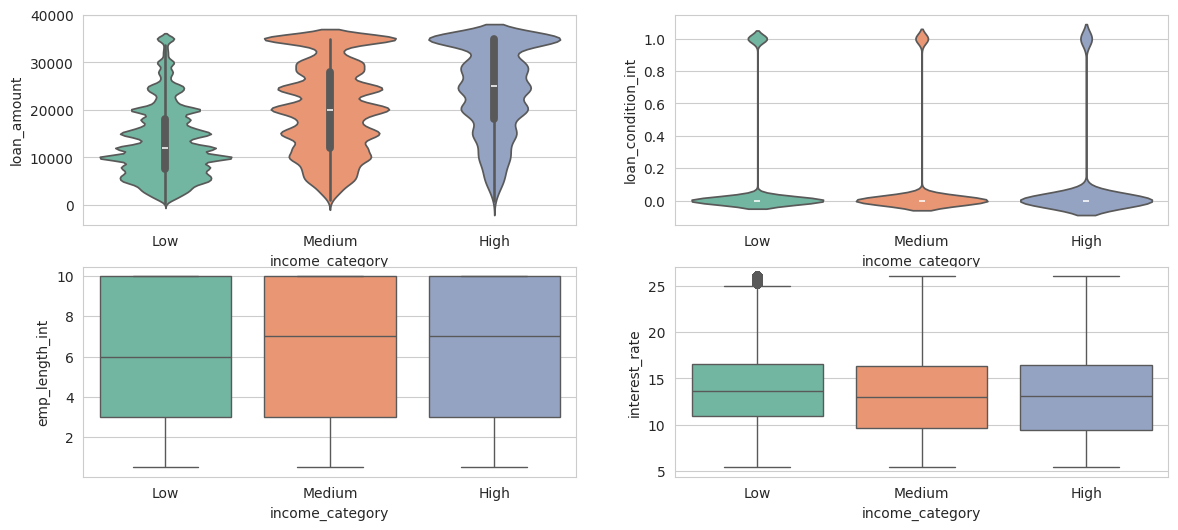

In [63]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(nrows=2, ncols=2, figsize=(14,6))

# Change the Palette types tomorrow!

sns.violinplot(x="income_category", y="loan_amount", data=df, palette="Set2", ax=ax1 )
sns.violinplot(x="income_category", y="loan_condition_int", data=df, palette="Set2", ax=ax2)
sns.boxplot(x="income_category", y="emp_length_int", data=df, palette="Set2", ax=ax3)
sns.boxplot(x="income_category", y="interest_rate", data=df, palette="Set2", ax=ax4)

<h1 align="center"> Assesing Risks </h1>
<h2> Understanding the Risky side of Business </h2>
<a id="risky_side"></a>

Although the <b> operative side of business </b> is important, we have to also analyze the level of risk in each state. Credit scores are important metrics to analyze the level of risk of an individual customer. However, there are also other important metrics to somehow estimate the level of risk of other states. <br><br>

<h4> What we need to know: </h4>
<ul>
<li> <b>Debt-to-income</b> is an important metric since it says approximately the level of debt of each individual consumer with respect to its total income. </li>
<li> The <b>average length of employment</b> tells us a better story about the labor market in each state which is helpful to assess the levelof risk. </li>
</ul>

<h4> Summary: </h4>
<ul>
<li> <b>IOWA</b> has the highest level of default ratio neverthless, the amount of loans issued in that state is <b>too low</b>. (Number of Bad loans is equal to 3) </li>
<li> California and Texas seem to have the lowest risk and the highest possible return for investors. However, I will look more deeply into these states and create other metrics analyze the level of risk for each state. </li>

</ul>


**Note: I will be updating these section sooner or later (Stay in touch!)**

In [64]:
by_condition = df.groupby('addr_state')['loan_condition'].value_counts()/ df.groupby('addr_state')['loan_condition'].count()
by_emp_length = df.groupby(['region', 'addr_state'], as_index=False).emp_length_int.mean().sort_values(by="addr_state")

loan_condition_bystate = pd.crosstab(df['addr_state'], df['loan_condition'] )

cross_condition = pd.crosstab(df["addr_state"], df["loan_condition"])
# Percentage of condition of loan
percentage_loan_contributor = pd.crosstab(df['addr_state'], df['loan_condition']).apply(lambda x: x/x.sum() * 100)
condition_ratio = cross_condition["Bad Loan"]/cross_condition["Good Loan"]
by_dti = df.groupby(['region', 'addr_state'], as_index=False).dti.mean()
state_codes = sorted(states)


# Take to a list
default_ratio = condition_ratio.values.tolist()
average_dti = by_dti['dti'].values.tolist()
average_emp_length = by_emp_length["emp_length_int"].values.tolist()
number_of_badloans = loan_condition_bystate['Bad Loan'].values.tolist()
percentage_ofall_badloans = percentage_loan_contributor['Bad Loan'].values.tolist()


# Figure Number 2
risk_data = OrderedDict([('state_codes', state_codes),
                         ('default_ratio', default_ratio),
                         ('badloans_amount', number_of_badloans),
                         ('percentage_of_badloans', percentage_ofall_badloans),
                         ('average_dti', average_dti),
                         ('average_emp_length', average_emp_length)])


# Figure 2 Dataframe
risk_df = pd.DataFrame.from_dict(risk_data)
risk_df = risk_df.round(decimals=3)
risk_df.head()

,state_codes,default_ratio,badloans_amount,percentage_of_badloans,average_dti,average_emp_length
0,AK,0.104,118,0.213,13.656,6.270
1,AL,0.159,803,1.451,16.876,6.509
2,AR,0.138,423,0.764,18.938,6.446
3,AZ,0.137,1292,2.335,18.287,5.782
4,CA,0.139,8698,15.720,17.806,5.929


In [65]:
# Now it comes the part where we plot out plotly United States map
for col in risk_df.columns:
    risk_df[col] = risk_df[col].astype(str)

scl = [[0.0, 'rgb(202, 202, 202)'],[0.2, 'rgb(253, 205, 200)'],[0.4, 'rgb(252, 169, 161)'],\
            [0.6, 'rgb(247, 121, 108  )'],[0.8, 'rgb(232, 70, 54)'],[1.0, 'rgb(212, 31, 13)']]

risk_df['text'] = risk_df['state_codes'] + '<br>' +\
'Number of Bad Loans: ' + risk_df['badloans_amount'] + '<br>' + \
'Percentage of all Bad Loans: ' + risk_df['percentage_of_badloans'] + '%' +  '<br>' + \
'Average Debt-to-Income Ratio: ' + risk_df['average_dti'] + '<br>'+\
'Average Length of Employment: ' + risk_df['average_emp_length']


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = risk_df['state_codes'],
        z = risk_df['default_ratio'],
        locationmode = 'USA-states',
        text = risk_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "%")
        ) ]


layout = dict(
    title = 'Lending Clubs Default Rates <br> (Analyzing Risks)',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')

## The Importance of Credit Scores:
<a id="credit_scores"></a>
Credit scores are important metrics for assesing the overall level of risk. In this section we will analyze the level of risk as a whole and how many loans were bad loans by the type of grade received in the credit score of the customer.

<h4> What we need to know: </h4>
<ul>
<li> The lower the grade of the credit score, the higher the risk for investors. </li>
<li> There are different factors that influence on the level of risk of the loan.</li>
</ul>

<h4> Summary: </h4>
<ul>
<li> The scores that has a lower grade received a larger amounts of loans (which might had contributed to a higher level of risk). </li>
<li> Logically, the <b>lower the grade the higher the interest</b> the customer had to pay back to investors.</li>
<li> Interstingly, customers with a <b>grade</b> of "C" were more likely to default on the loan </li>
<ul>

In [ ]:
# Let's visualize how many loans were issued by creditscore
f, ((ax1, ax2)) = plt.subplots(1, 2)
cmap = plt.cm.coolwarm

by_credit_score = df.groupby(['year', 'grade']).loan_amount.mean()
by_credit_score.unstack().plot(legend=False, ax=ax1, figsize=(14, 4), colormap=cmap)
ax1.set_title('Loans issued by Credit Score', fontsize=14)


by_inc = df.groupby(['year', 'grade']).interest_rate.mean()
by_inc.unstack().plot(ax=ax2, figsize=(14, 4), colormap=cmap)
ax2.set_title('Interest Rates by Credit Score', fontsize=14)

ax2.legend(bbox_to_anchor=(-1.0, -0.3, 1.7, 0.1), loc=5, prop={'size':12},
           ncol=7, mode="expand", borderaxespad=0.)

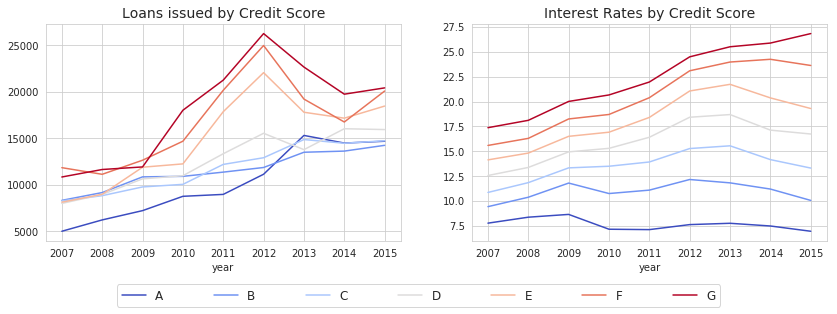

Text(0.5, 1.0, 'Type of Loans by Sub-Grade')

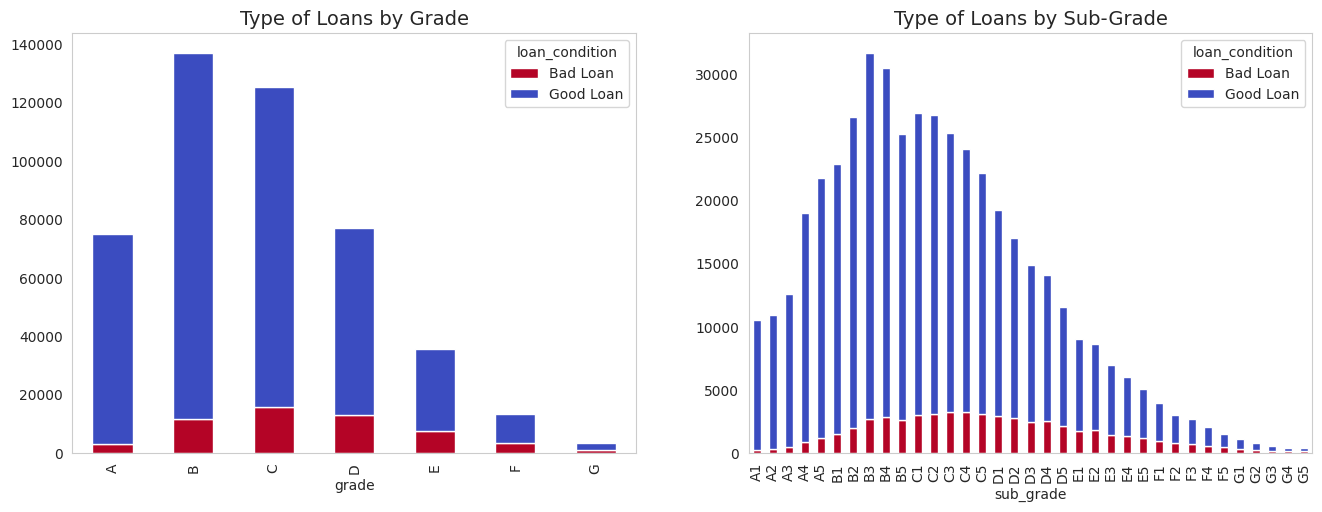

In [70]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

cmap = plt.cm.coolwarm_r

loans_by_region = df.groupby(['grade', 'loan_condition']).size()
loans_by_region.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
ax1.set_title('Type of Loans by Grade', fontsize=14)


loans_by_grade = df.groupby(['sub_grade', 'loan_condition']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax2, grid=False)
ax2.set_title('Type of Loans by Sub-Grade', fontsize=14)

# by_interest = df.groupby(['year', 'loan_condition']).interest_rate.mean()
# by_interest.unstack().plot(ax=ax3, colormap=cmap)
# ax3.set_title('Average Interest rate by Loan Condition', fontsize=14)
# ax3.set_ylabel('Interest Rate (%)', fontsize=12)

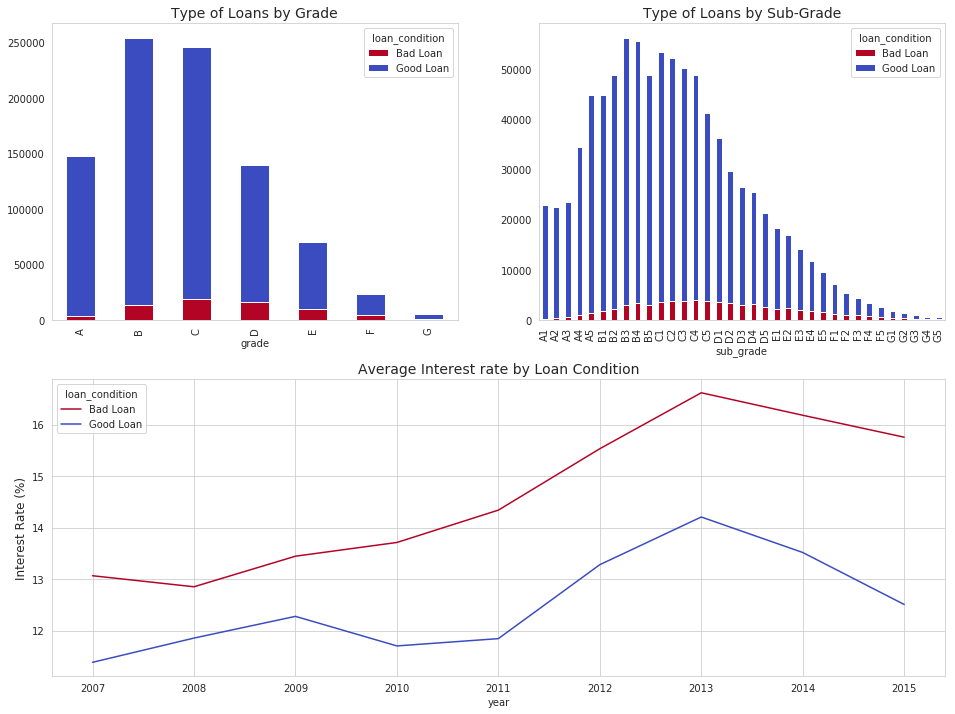

<h2>What Determines a Bad Loan </h2>
<a id="determines_bad_loan"></a>
My main aim in this section is to find the main factors that causes for a loan to be considered a <b>"Bad Loan"</b>. Logically, we could assume that factors such as a low credit grade or a high debt to income could be possible contributors in determining whether a loan is at a high risk of being defaulted. <br><br>

<h4> What we need to know: </h4>
<ul>
<li> There might be possible factors that contribute in whether a loan is bad or not. </li>
<li> Factors that increase risk include: low annual income, high debt to income, high interest rates, low grade, among others. </li>
</ul>

<h4> Summary: </h4>
<ul>
<li> The types of bad loans in the last year are having a tendency to<b> decline</b>, except for late payments (might indicate an economical recovery.) </li>
<li> <b>Mortgage </b> was the variable from the home ownership column that used the highest amount borrowed within loans that were considered to be bad.</li>
<li> There is a slight <b>increase</b> on people who have mortgages that are applying for a loan.</li>
<li>People who have a mortgage (depending on other factors as well within the mortgage) are more likely to ask for <bhigher loan amounts than other people who have other types of home ownerships. </li>
</ul>

In [71]:
# Just get me the numeric variables
numeric_variables = df.select_dtypes(exclude=["object"])

In [ ]:
# We will use df_correlations dataframe to analyze our correlations.


df_correlations = df.corr()


trace = go.Heatmap(z=df_correlations.values,
                   x=df_correlations.columns,
                   y=df_correlations.columns,
                  colorscale=[[0.0, 'rgb(165,0,38)'],
                              [0.1111111111111111, 'rgb(215,48,39)'],
                              [0.2222222222222222, 'rgb(244,109,67)'],
                              [0.3333333333333333, 'rgb(253,174,97)'],
                              [0.4444444444444444, 'rgb(254,224,144)'],
                              [0.5555555555555556, 'rgb(224,243,248)'],
                              [0.6666666666666666, 'rgb(171,217,233)'],
                              [0.7777777777777778, 'rgb(116,173,209)'],
                              [0.8888888888888888, 'rgb(69,117,180)'],
                              [1.0, 'rgb(49,54,149)']],
            colorbar = dict(
            title = 'Level of Correlation',
            titleside = 'top',
            tickmode = 'array',
            tickvals = [-0.52,0.2,0.95],
            ticktext = ['Negative Correlation','Low Correlation','Positive Correlation'],
            ticks = 'outside'
        )
                  )


layout = {"title": "Correlation Heatmap"}
data=[trace]

fig = dict(data=data, layout=layout)
iplot(fig, filename='labelled-heatmap')

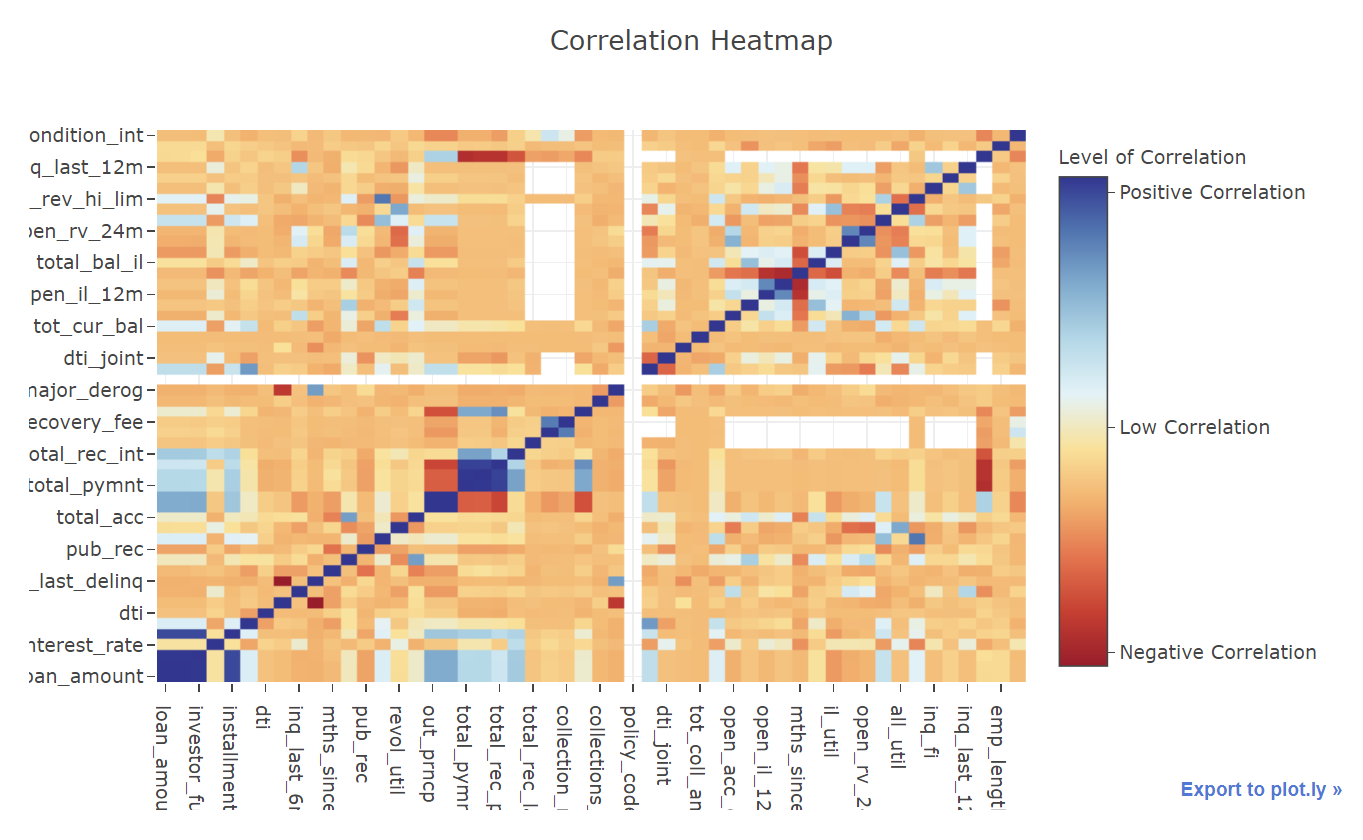

This data looks a little but messy maybe if we focus our correlation heatmap into columns that are more worth it we might actually see a trend with the **condition of the loan**.

In [ ]:
title = 'Bad Loans: Loan Statuses'

labels = bad_loan # All the elements that comprise a bad loan.

len(labels)
colors = ['rgba(236, 112, 99, 1)', 'rgba(235, 152, 78, 1)', 'rgba(52, 73, 94, 1)', 'rgba(128, 139, 150, 1)',
         'rgba(255, 87, 51, 1)', 'rgba(255, 195, 0, 1)']

mode_size = [8,8,8,8,8,8]

line_size = [2,2,2,2,2,2]

x_data = [
    sorted(df['year'].unique().tolist()),
    sorted(df['year'].unique().tolist()),
    sorted(df['year'].unique().tolist()),
    sorted(df['year'].unique().tolist()),
    sorted(df['year'].unique().tolist()),
    sorted(df['year'].unique().tolist()),
]

# type of loans
charged_off = df['loan_amount'].loc[df['loan_status'] == 'Charged Off'].values.tolist()
defaults = df['loan_amount'].loc[df['loan_status'] == 'Default'].values.tolist()
not_credit_policy = df['loan_amount'].loc[df['loan_status'] == 'Does not meet the credit policy. Status:Charged Off'].values.tolist()
grace_period = df['loan_amount'].loc[df['loan_status'] == 'In Grace Period'].values.tolist()
short_late = df['loan_amount'].loc[df['loan_status'] == 'Late (16-30 days)'].values.tolist()
long_late = df['loan_amount'].loc[df['loan_status'] == 'Late (31-120 days)'].values.tolist()

y_data = [
    charged_off,
    defaults,
    not_credit_policy,
    grace_period,
    short_late,
    long_late,
]

p_charged_off = go.Scatter(
    x = x_data[0],
    y = y_data[0],
    name = 'A. Charged Off',
    line = dict(
        color = colors[0],
        width = 3,
        dash='dash')
)

p_defaults = go.Scatter(
    x = x_data[1],
    y = y_data[1],
    name = 'A. Defaults',
    line = dict(
        color = colors[1],
        width = 3,
        dash='dash')
)

p_credit_policy = go.Scatter(
    x = x_data[2],
    y = y_data[2],
    name = 'Not Meet C.P',
    line = dict(
        color = colors[2],
        width = 3,
        dash='dash')
)

p_graced = go.Scatter(
    x = x_data[3],
    y = y_data[3],
    name = 'A. Graced Period',
    line = dict(
        color = colors[3],
        width = 3,
        dash='dash')
)

p_short_late = go.Scatter(
    x = x_data[4],
    y = y_data[4],
    name = 'Late (16-30 days)',
    line = dict(
        color = colors[4],
        width = 3,
        dash='dash')
)

p_long_late = go.Scatter(
    x = x_data[5],
    y = y_data[5],
    name = 'Late (31-120 days)',
    line = dict(
        color = colors[5],
        width = 3,
        dash='dash')
)




data=[p_charged_off, p_defaults, p_credit_policy, p_graced, p_short_late, p_long_late]

layout = dict(title = 'Types of Bad Loans <br> (Amount Borrowed Throughout the Years)',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Amount Issued'),
              )

fig = dict(data=data, layout=layout)


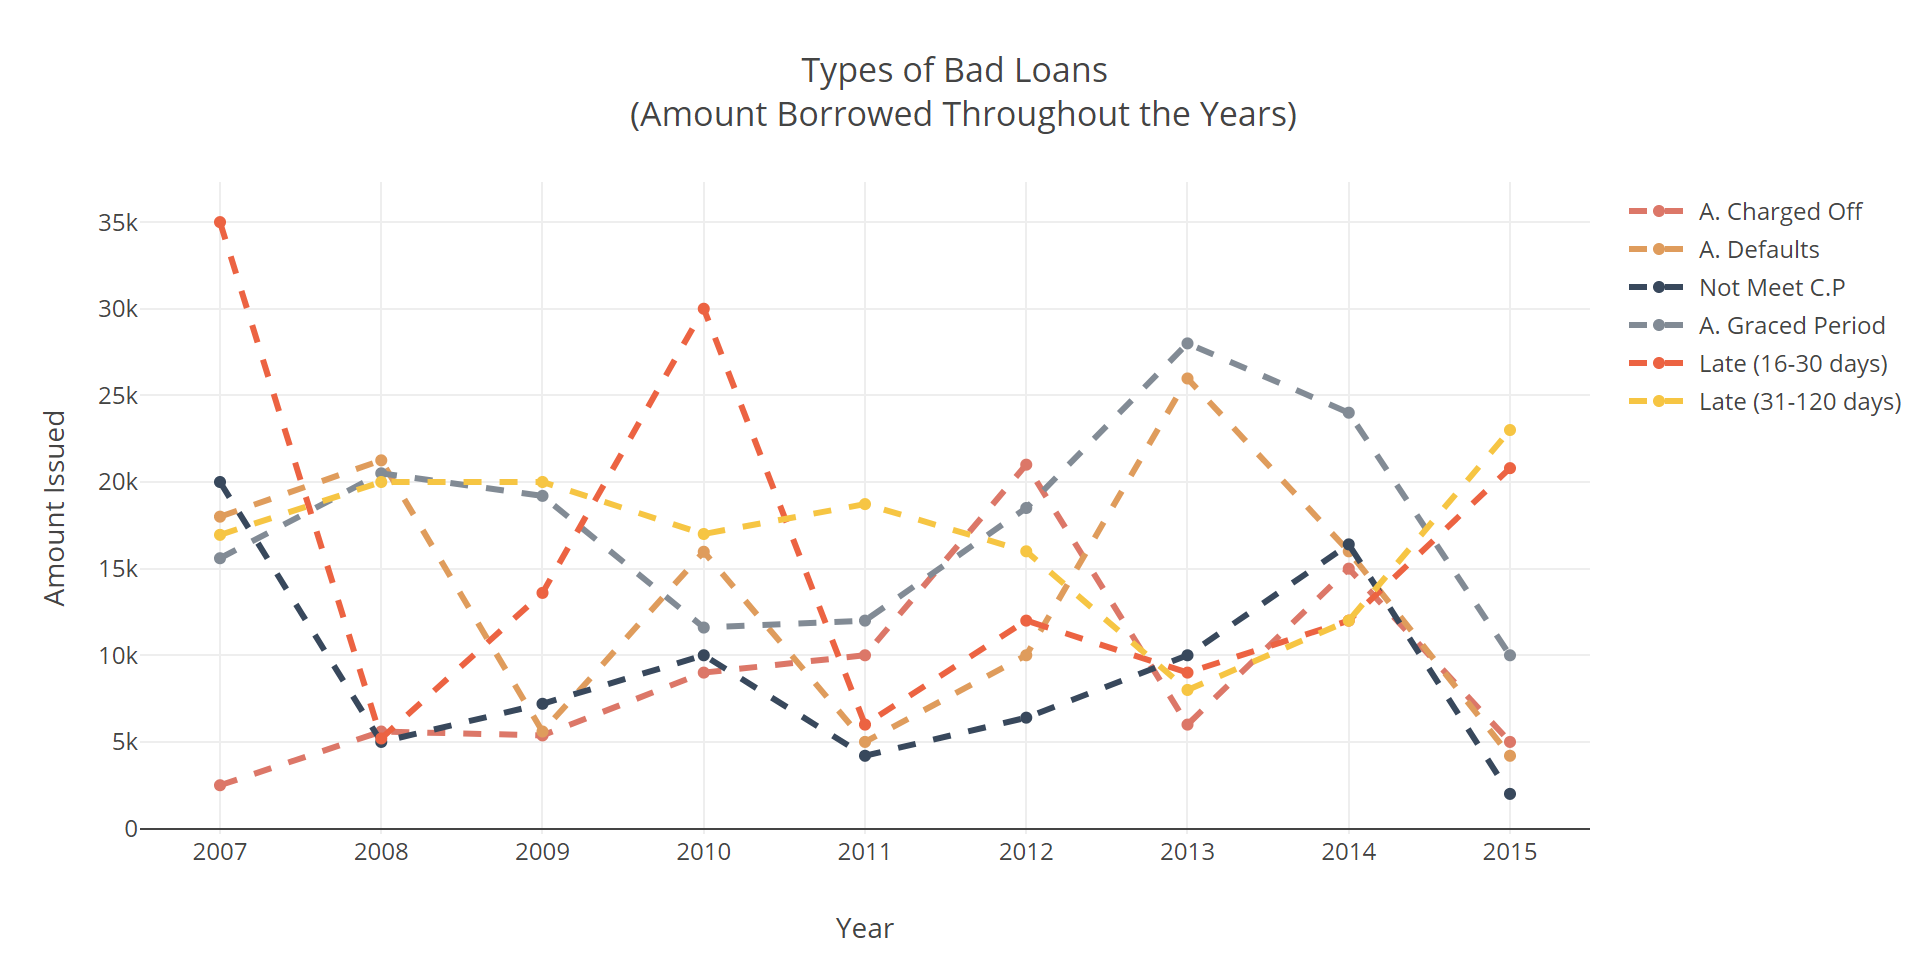

In [ ]:
import seaborn as sns

plt.figure(figsize=(18,18))

# Create a dataframe for bad loans
bad_df = df.loc[df['loan_condition'] == 'Bad Loan']

plt.subplot(211)
g = sns.boxplot(x='home_ownership', y='loan_amount', hue='loan_condition',
               data=bad_df, color='r')

g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Type of Home Ownership", fontsize=12)
g.set_ylabel("Loan Amount", fontsize=12)
g.set_title("Distribution of Amount Borrowed \n by Home Ownership", fontsize=16)



plt.subplot(212)
g1 = sns.boxplot(x='year', y='loan_amount', hue='home_ownership',
               data=bad_df, palette="Set3")
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("Type of Home Ownership", fontsize=12)
g1.set_ylabel("Loan Amount", fontsize=12)
g1.set_title("Distribution of Amount Borrowed \n through the years", fontsize=16)


plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

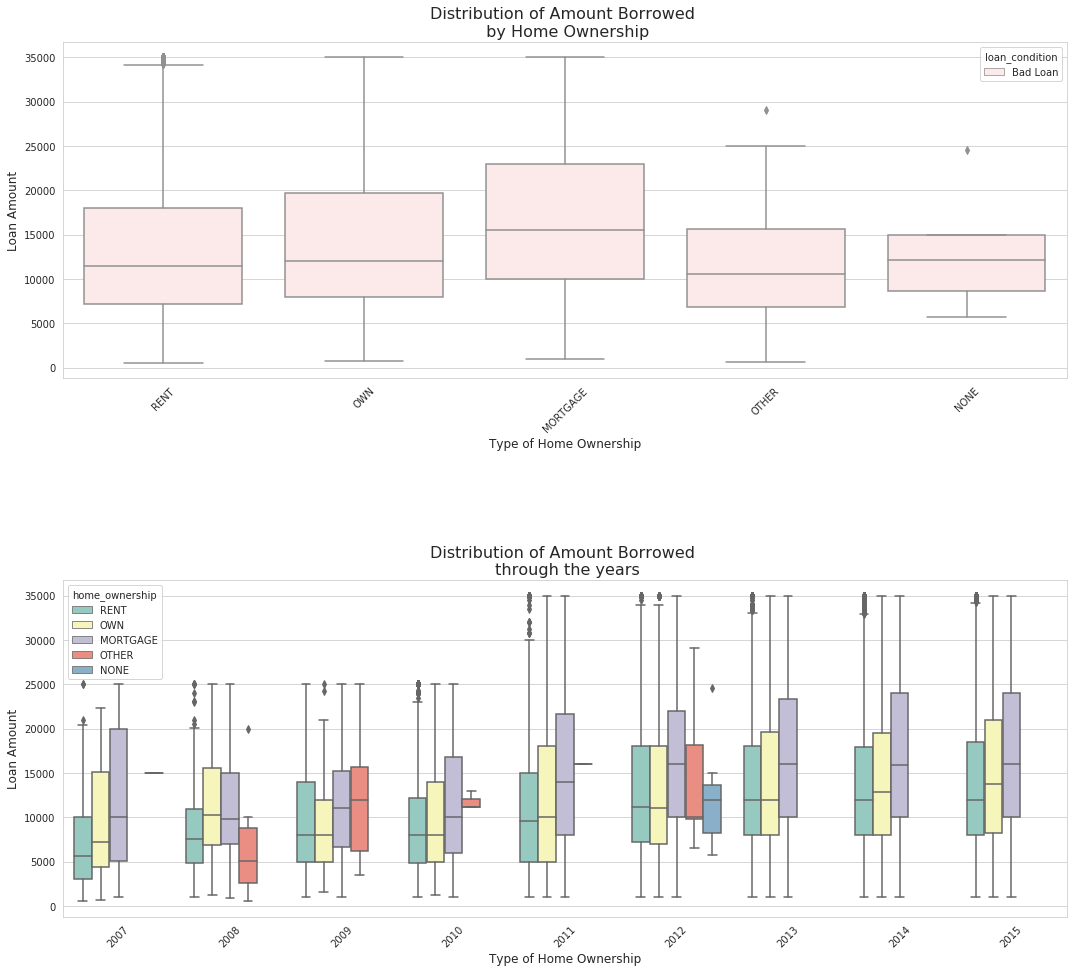

## Defaulted Loans and Level of Risk:
<a id="defaulted_loans"></a>
From all the bad loans the one we are most interested about are the loans that are defaulted. Therefore, in this section we will implement an in-depth analysis of these types of Loans and see if we can gain any insight as to which features have a high correlation with the loan being defaulted.

## Main Aim:
<ul>
<li> Determine patters that will allow us to understand somehow factors that contribute to a loan being <b>defaulted</b> </li>
</ul>

## Summary:
<ul>
<li>In the last year recorded, the <b>Midwest </b>  and <b> SouthEast </b> regions had the most defaults. </li>
<li>Loans that have a <b>high interest rate</b>(above 13.23%) are more likely to become a <b>bad loan </b>. </li>
<li>Loans that have a longer <b> maturity date (60 months) </b> are more likely to be a bad loan. </li>
</ul>



In [ ]:
# Get the loan amount for loans that were defaulted by each region.
northe_defaults = df['loan_amount'].loc[(df['region'] == 'NorthEast') & (df['loan_status'] == 'Default')].values.tolist()
southw_defaults = df['loan_amount'].loc[(df['region'] == 'SouthWest') & (df['loan_status'] == 'Default')].values.tolist()
southe_defaults = df['loan_amount'].loc[(df['region'] == 'SouthEast') & (df['loan_status'] == 'Default')].values.tolist()
west_defaults = df['loan_amount'].loc[(df['region'] == 'West') & (df['loan_status'] == 'Default')].values.tolist()
midw_defaults = df['loan_amount'].loc[(df['region'] == 'MidWest') & (df['loan_status'] == 'Default')].values.tolist()

# Cumulative Values
y0_stck=northe_defaults
y1_stck=[y0+y1 for y0, y1 in zip(northe_defaults, southw_defaults)]
y2_stck=[y0+y1+y2 for y0, y1, y2 in zip(northe_defaults, southw_defaults, southe_defaults)]
y3_stck=[y0+y1+y2+y3 for y0, y1, y2, y3 in zip(northe_defaults, southw_defaults, southe_defaults, west_defaults)]
y4_stck=[y0+y1+y2+y3+y4 for y0, y1, y2, y3, y4 in zip(northe_defaults, southw_defaults, southe_defaults, west_defaults, midw_defaults)]

# Make original values strings and add % for hover text
y0_txt=['$' + str(y0) for y0 in northe_defaults]
y1_txt=['$' + str(y1) for y1 in southw_defaults]
y2_txt=['$' + str(y2) for y2 in southe_defaults]
y3_txt=['$' + str(y3) for y3 in west_defaults]
y4_txt=['$'+ str(y4) for y4 in midw_defaults]

year = sorted(df["year"].unique().tolist())

NorthEast_defaults = go.Scatter(
    x= year,
    y= y0_stck,
    text=y0_txt,
    hoverinfo='x+text',
    name='NorthEast',
    mode= 'lines',
    line=dict(width=0.5,
             color='rgb(131, 90, 241)'),
    fill='tonexty'
)
SouthWest_defaults = go.Scatter(
    x=year,
    y=y1_stck,
    text=y1_txt,
    hoverinfo='x+text',
    name='SouthWest',
    mode= 'lines',
    line=dict(width=0.5,
             color='rgb(255, 140, 0)'),
    fill='tonexty'
)

SouthEast_defaults = go.Scatter(
    x= year,
    y= y2_stck,
    text=y2_txt,
    hoverinfo='x+text',
    name='SouthEast',
    mode= 'lines',
    line=dict(width=0.5,
             color='rgb(240, 128, 128)'),
    fill='tonexty'
)

West_defaults = go.Scatter(
    x= year,
    y= y3_stck,
    text=y3_txt,
    hoverinfo='x+text',
    name='West',
    mode= 'lines',
    line=dict(width=0.5,
             color='rgb(135, 206, 235)'),
    fill='tonexty'
)

MidWest_defaults = go.Scatter(
    x= year,
    y= y4_stck,
    text=y4_txt,
    hoverinfo='x+text',
    name='MidWest',
    mode= 'lines',
    line=dict(width=0.5,
             color='rgb(240, 230, 140)'),
    fill='tonexty'
    )


data = [NorthEast_defaults, SouthWest_defaults, SouthEast_defaults, West_defaults, MidWest_defaults]

layout = dict(title = 'Amount Defaulted by Region',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Amount Defaulted')
             )

fig = dict(data=data, layout=layout)

iplot(fig, filename='basic-area-no-bound')


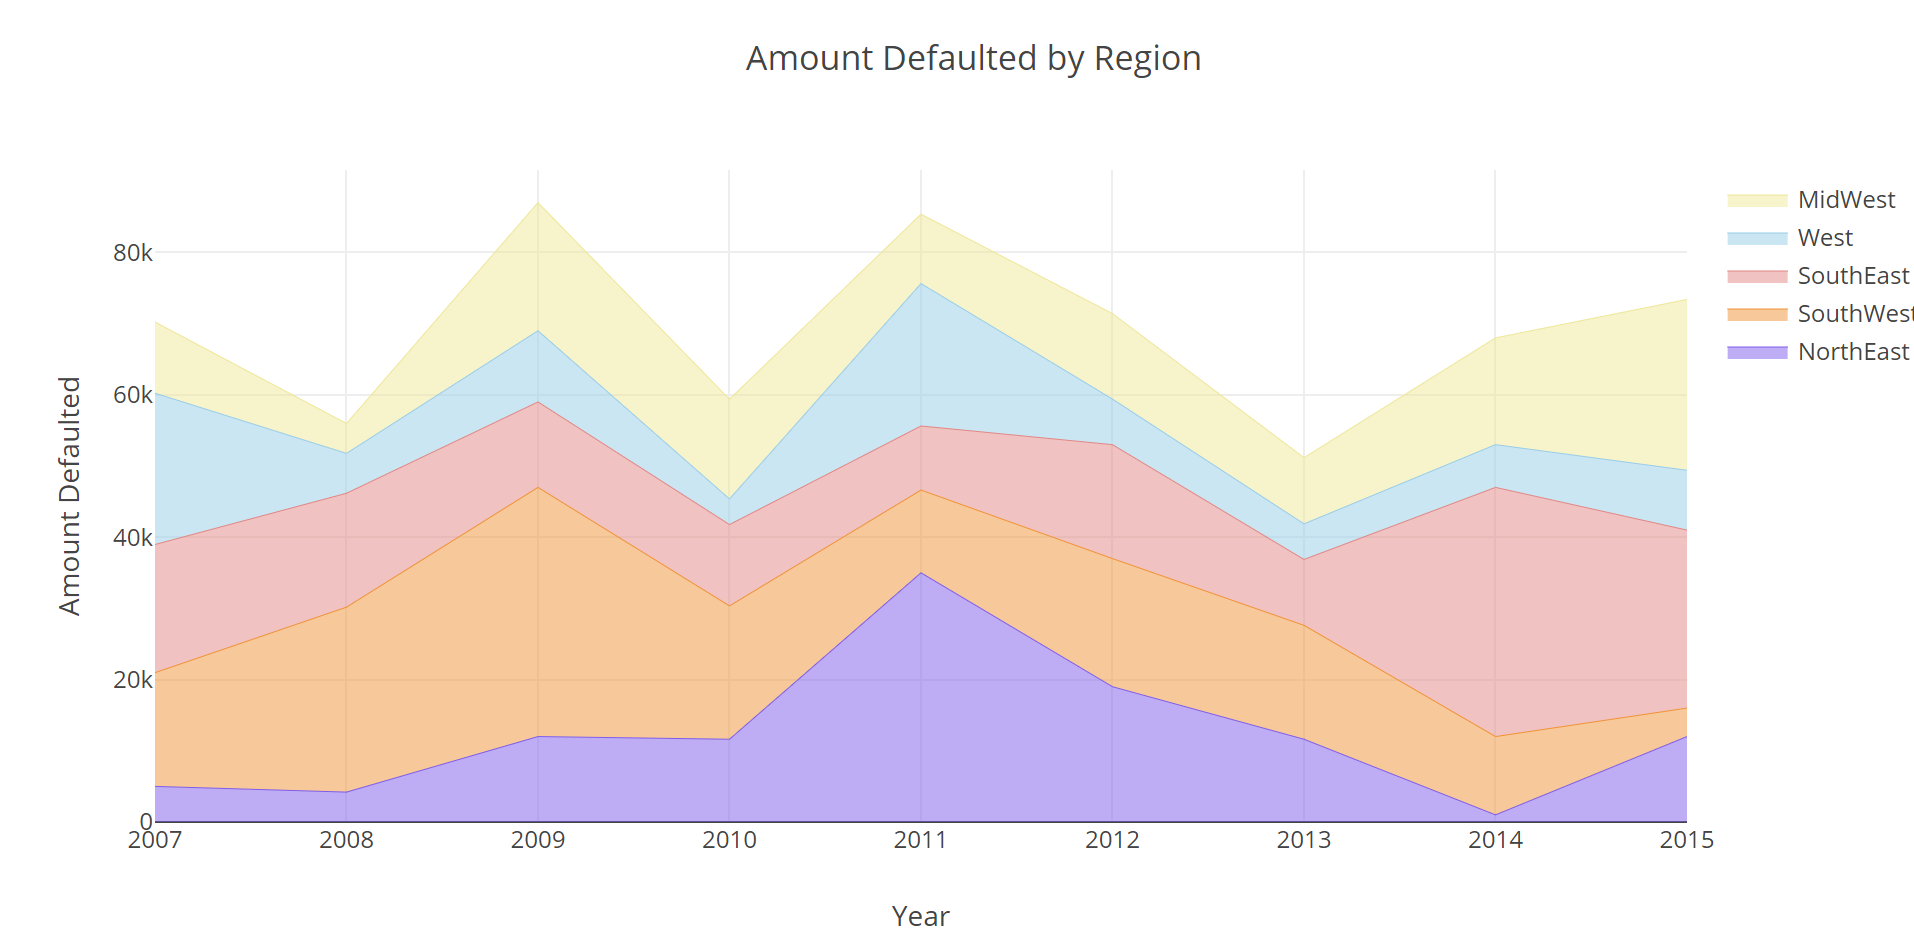

In [76]:
df['interest_rate'].describe()
# Average interest is 13.26% Anything above this will be considered of high risk let's see if this is true.
df['interest_payments'] = np.nan
lst = [df]

for col in lst:
    col.loc[col['interest_rate'] <= 13.23, 'interest_payments'] = 'Low'
    col.loc[col['interest_rate'] > 13.23, 'interest_payments'] = 'High'

df.head()

,loan_amount,funded_amount,investor_funds,term,interest_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,loan_condition,region,emp_length_int,income_category,loan_condition_int,interest_payments
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,NaN,NaN,NaN,NaN,Good Loan,SouthWest,10.0,Low,0,Low
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,NaN,NaN,NaN,NaN,Bad Loan,SouthEast,0.5,Low,1,High
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,NaN,NaN,NaN,NaN,Good Loan,MidWest,10.0,Low,0,High
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,NaN,NaN,NaN,NaN,Good Loan,West,10.0,Low,0,High
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,...,NaN,NaN,NaN,NaN,Good Loan,West,1.0,Low,0,Low


In [77]:
df['term'].value_counts()

term
 36 months    337953
 60 months    128332
Name: count, dtype: int64

<ipython-input-78-0e0e3842eb75>:28: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-78-0e0e3842eb75>:29: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




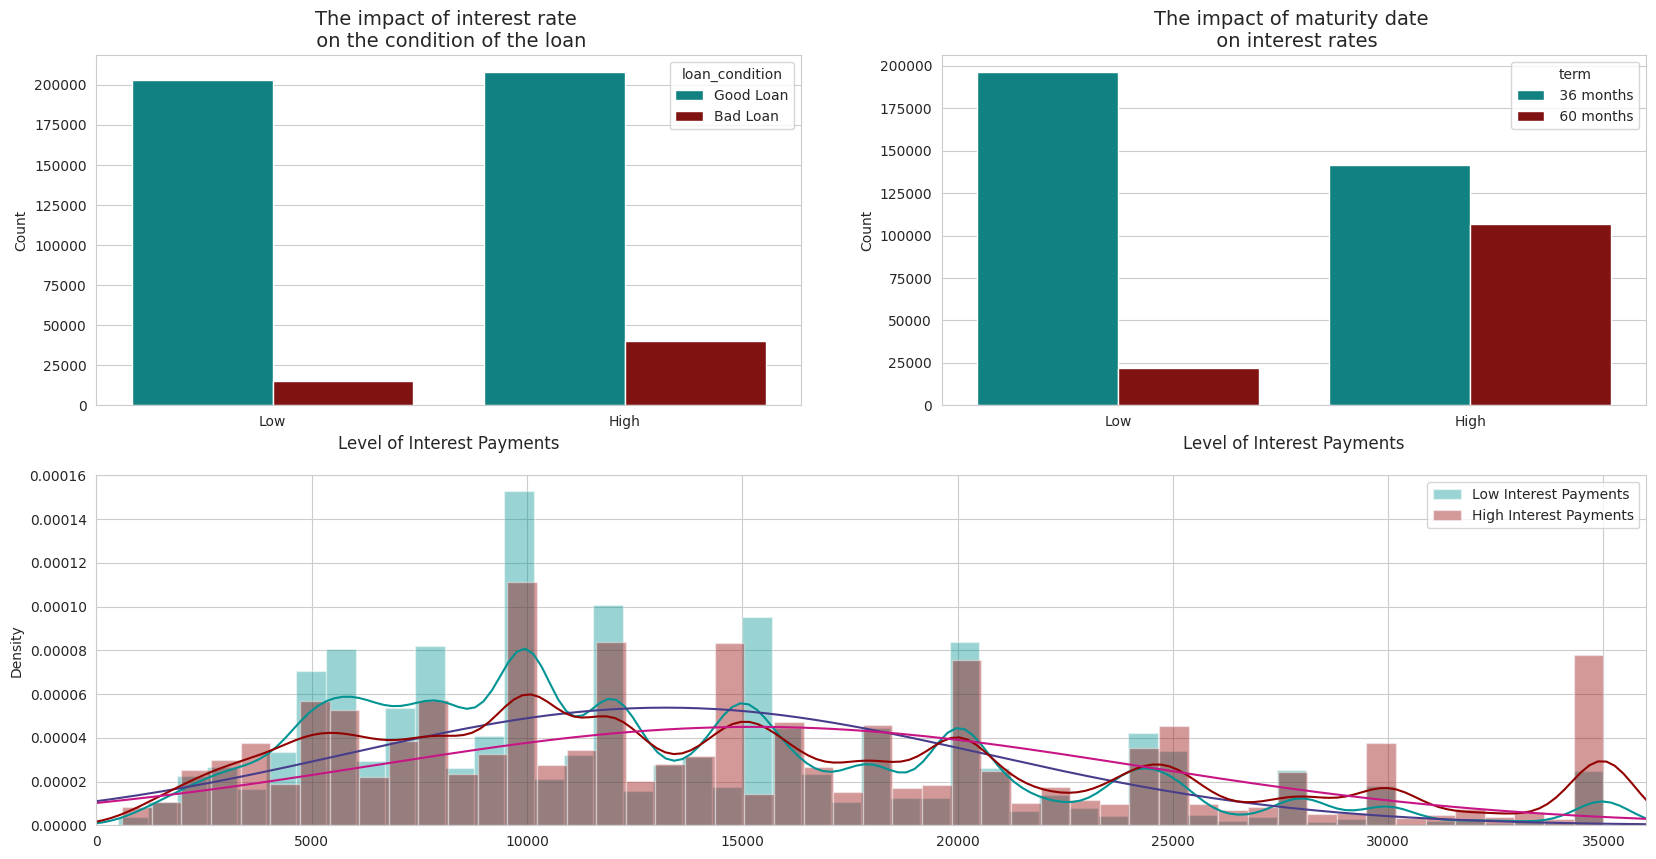

In [78]:
from scipy.stats import norm

plt.figure(figsize=(20,10))

palette = ['#009393', '#930000']
plt.subplot(221)
ax = sns.countplot(x='interest_payments', data=df,
                  palette=palette, hue='loan_condition')

ax.set_title('The impact of interest rate \n on the condition of the loan', fontsize=14)
ax.set_xlabel('Level of Interest Payments', fontsize=12)
ax.set_ylabel('Count')

plt.subplot(222)
ax1 = sns.countplot(x='interest_payments', data=df,
                   palette=palette, hue='term')

ax1.set_title('The impact of maturity date \n on interest rates', fontsize=14)
ax1.set_xlabel('Level of Interest Payments', fontsize=12)
ax1.set_ylabel('Count')


plt.subplot(212)
low = df['loan_amount'].loc[df['interest_payments'] == 'Low'].values
high = df['loan_amount'].loc[df['interest_payments'] == 'High'].values


ax2= sns.distplot(low, color='#009393', label='Low Interest Payments', fit=norm, fit_kws={"color":"#483d8b"}) # Dark Blue Norm Color
ax3 = sns.distplot(high, color='#930000', label='High Interest Payments', fit=norm, fit_kws={"color":"#c71585"}) #  Red Norm Color
plt.axis([0, 36000, 0, 0.00016])
plt.legend()


plt.show()


## Risk Assesment:
The main aim in this section is to compare the average interest rate for the loan status belonging to each type of loans (Good loan or bad loan) and see if there is any significant difference in the average of interest rate for each of the groups.

## Summary:
<ul>
<li> <b> Bad Loans: </b>  Most of the loan statuses belonging to this group pay a interest ranging from 15% - 16%. </li>
<li><b>Good Loans:</b> Most of the loan statuses belonging to this group pay interest ranging from 12% - 13%.  </li>
<li>There has to be a better assesment of risk since there is not that much of a difference in interest payments from <b>Good Loans</b> and <b>Bad Loans</b>. </li>
<li> Remember, most loan statuses are <b>Current</b> so there is a risk that at the end of maturity some of these loans might become bad loans. </li>
</ul>

<br>

*Credits to Zhiwen for providing an important aspect of the analysis (Relationship of interest rates and loan condition).*

In [79]:
# Interest rate good loans
avg_fully_paid = round(np.mean(df['interest_rate'].loc[df['loan_status'] == 'Fully Paid'].values), 2)
avg_current = round(np.mean(df['interest_rate'].loc[df['loan_status'] == 'Current'].values), 2)
avg_issued = round(np.mean(df['interest_rate'].loc[df['loan_status'] == 'Issued'].values), 2)
avg_long_fully_paid = round(np.mean(df['interest_rate'].loc[df['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid'].values), 2)



# Interest rate bad loans

avg_default_rates = round(np.mean(df['interest_rate'].loc[df['loan_status'] == 'Default'].values), 2)
avg_charged_off = round(np.mean(df['interest_rate'].loc[df['loan_status'] == 'Charged Off'].values), 2)
avg_long_charged_off = round(np.mean(df['interest_rate'].loc[df['loan_status'] == 'Does not meet the credit policy. Status:Charged Off'].values), 2)
avg_grace_period = round(np.mean(df['interest_rate'].loc[df['loan_status'] == 'In Grace Period'].values), 2)
avg_short_late = round(np.mean(df['interest_rate'].loc[df['loan_status'] == 'Late (16-30 days)'].values), 2)
avg_long_late = round(np.mean(df['interest_rate'].loc[df['loan_status'] == 'Late (31-120 days)'].values), 2)


# Take to a dataframe

data = [
    go.Scatterpolar(
        mode='lines+markers',
      r = [avg_fully_paid, avg_current, avg_issued, avg_long_fully_paid],
      theta = ['Fully Paid', 'Current', 'Issued', 'No C.P. Fully Paid'],
      fill = 'toself',
      name = 'Good Loans',
        line = dict(
        color = "#63AF63"
      ),
      marker = dict(
        color = "#B3FFB3",
        symbol = "square",
        size = 8
      ),
      subplot = "polar",
    ),
    go.Scatterpolar(
        mode='lines+markers',
      r = [avg_default_rates, avg_charged_off, avg_long_charged_off, avg_grace_period, avg_short_late, avg_long_late],
      theta = ['Default Rate', 'Charged Off', 'C.P. Charged Off', 'In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)'],
      fill = 'toself',
      name = 'Bad Loans',
        line = dict(
        color = "#C31414"
      ),
      marker = dict(
        color = "#FF5050",
        symbol = "square",
        size = 8
      ),
      subplot = "polar2"
    )
]

layout = go.Layout(
    title="Average Interest Rates <br> Loan Status Distribution",
    showlegend = False,
     paper_bgcolor = "rgb(255, 248, 243)",
    polar = dict(
      domain = dict(
        x = [0,0.4],
        y = [0,1]
      ),
      radialaxis = dict(
        tickfont = dict(
          size = 8
        )
      ),
      angularaxis = dict(
        tickfont = dict(
          size = 8
        ),
        rotation = 90,
        direction = "counterclockwise"
      )
    ),
    polar2 = dict(
      domain = dict(
        x = [0.6,1],
        y = [0,1]
      ),
      radialaxis = dict(
        tickfont = dict(
          size = 8
        )
      ),
      angularaxis = dict(
        tickfont = dict(
          size = 8
        ),
        rotation = 90,
        direction = "clockwise"
      ),
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='polar/directions')

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



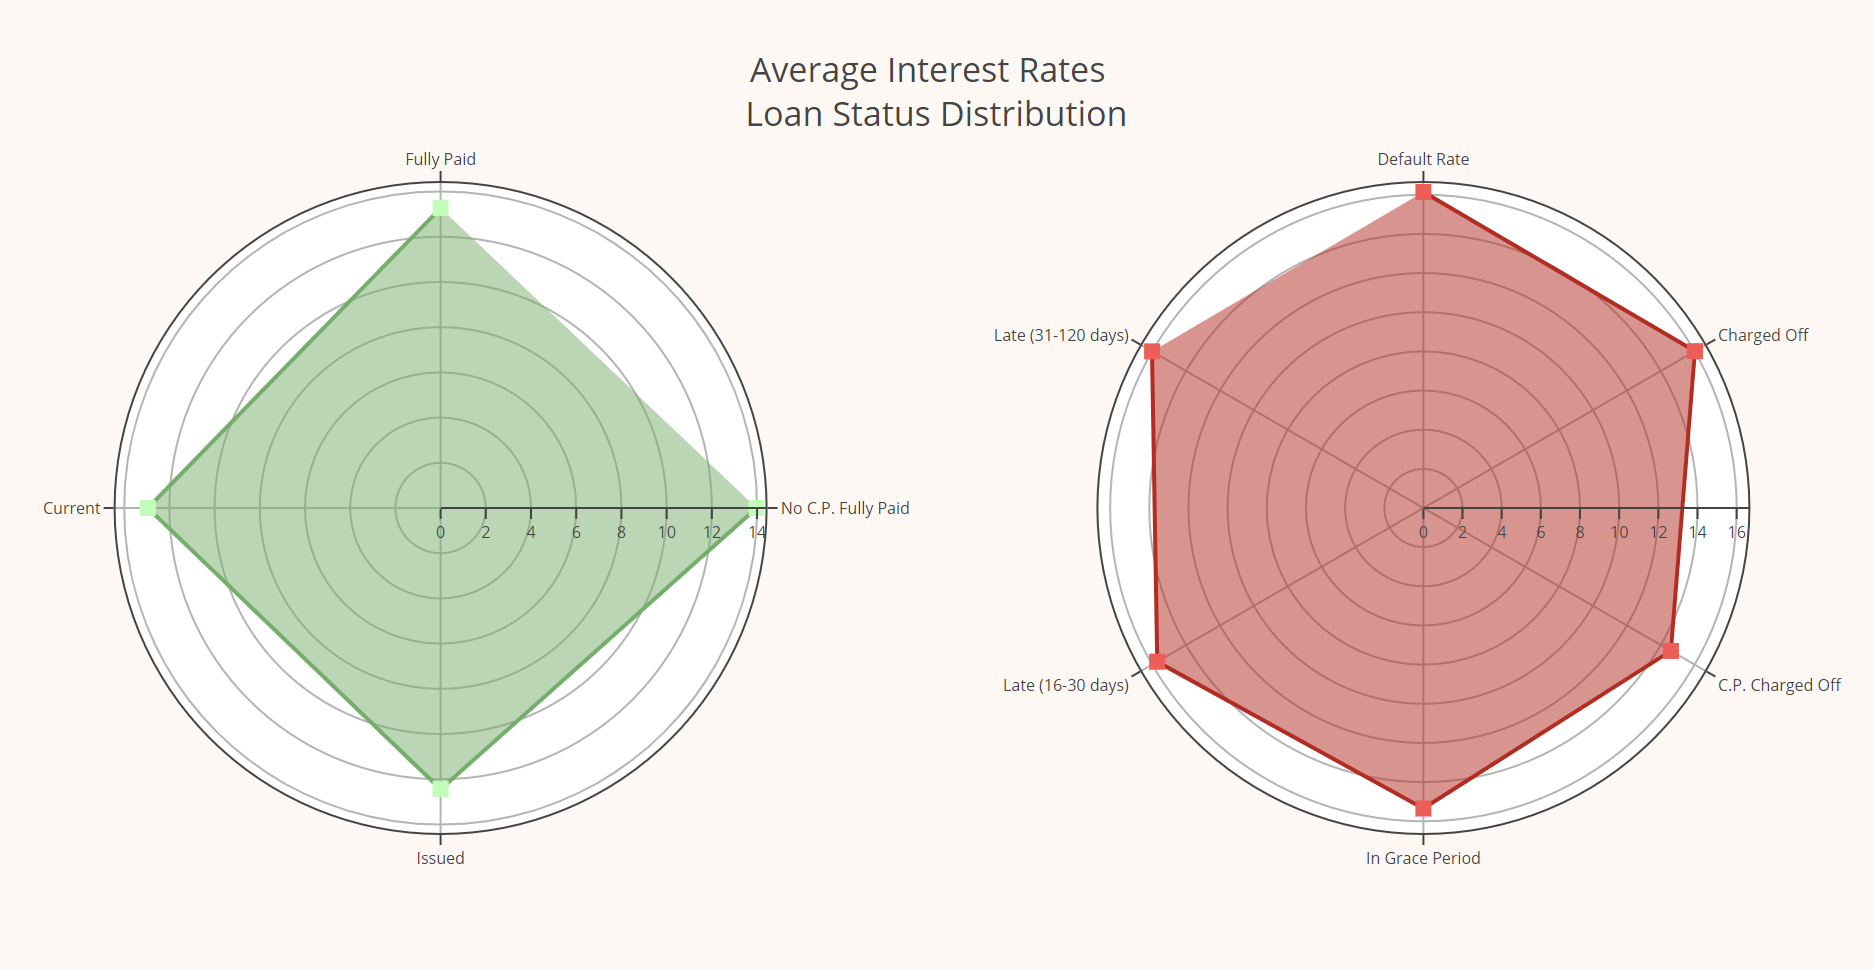

## Condition of Loans and Purpose:
<a id="loan_condition"></a>
In this section we will go into depth regarding the <b>reasons for clients to apply for a loan. </b> Our main aim is to see if there are purposes that contribute to a <b> "higher" </b> risk whether the loan will be repaid or not.

### Summary:
<ul>
<li> <b>Bad Loans Count: </b> People that apply for educational and small business purposed tend to have a higher risk of being a bad loan. (% wise) </li>
<li><b>Most frequent Purpose: </b> The reason that clients applied the most for a loan was to consolidate debt. </li>
<li><b>Less frequent purpose:</b> Clients applied less for educational purposes for all three income categories.  </li>
<li><b>Interest Rates: </b> In all reasons for application except (medical, small business and credi card), the low income category has a higher interest rate. Something that could possibly explain this is the amount of capital that is needed from other income categories that might explain why the low income categories interest rate for these puposes are lower.  </li>
<li><b>Bad/Good Ratio:</b> Except for educational purposes (we see a spike in high income this is due to the reasons that only two loans were issued and one was a bad loan which caused this ratio to spike to 50%.), but we can see that in all other purposed the bad good ratio is lower the higher your income category.  </li>

</ul>

In [80]:
df['purpose'].value_counts()

# Education, renewable energy, wedding are the purposed that contains highest bad loans percent wise.

purpose_condition = round(pd.crosstab(df['loan_condition'], df['purpose']).apply(lambda x: x/x.sum() * 100), 2)

purpose_bad_loans = purpose_condition.values[0].tolist()
purpose_good_loans = purpose_condition.values[1].tolist()
purpose = purpose_condition.columns


bad_plot = go.Bar(
    x=purpose,
    y=purpose_bad_loans,
    name = 'Bad Loans',
    text='%',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line = dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2
        )
    )
)

good_plot = go.Bar(
    x=purpose,
    y=purpose_good_loans,
    name='Good Loans',
    text='%',
    marker=dict(
        color='rgba(50, 171, 96, 0.7)',
        line = dict(
            color='rgba(50, 171, 96, 1.0)',
            width=2
        )
    )
)


data = [bad_plot, good_plot]

layout = go.Layout(
    title='Condition of Loan by Purpose',
    xaxis=dict(
        title=''
    ),
    yaxis=dict(
        title='% of the Loan',
    ),
    paper_bgcolor='#FFF8DC',
    plot_bgcolor='#FFF8DC',
    showlegend=True
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='condition_purposes')

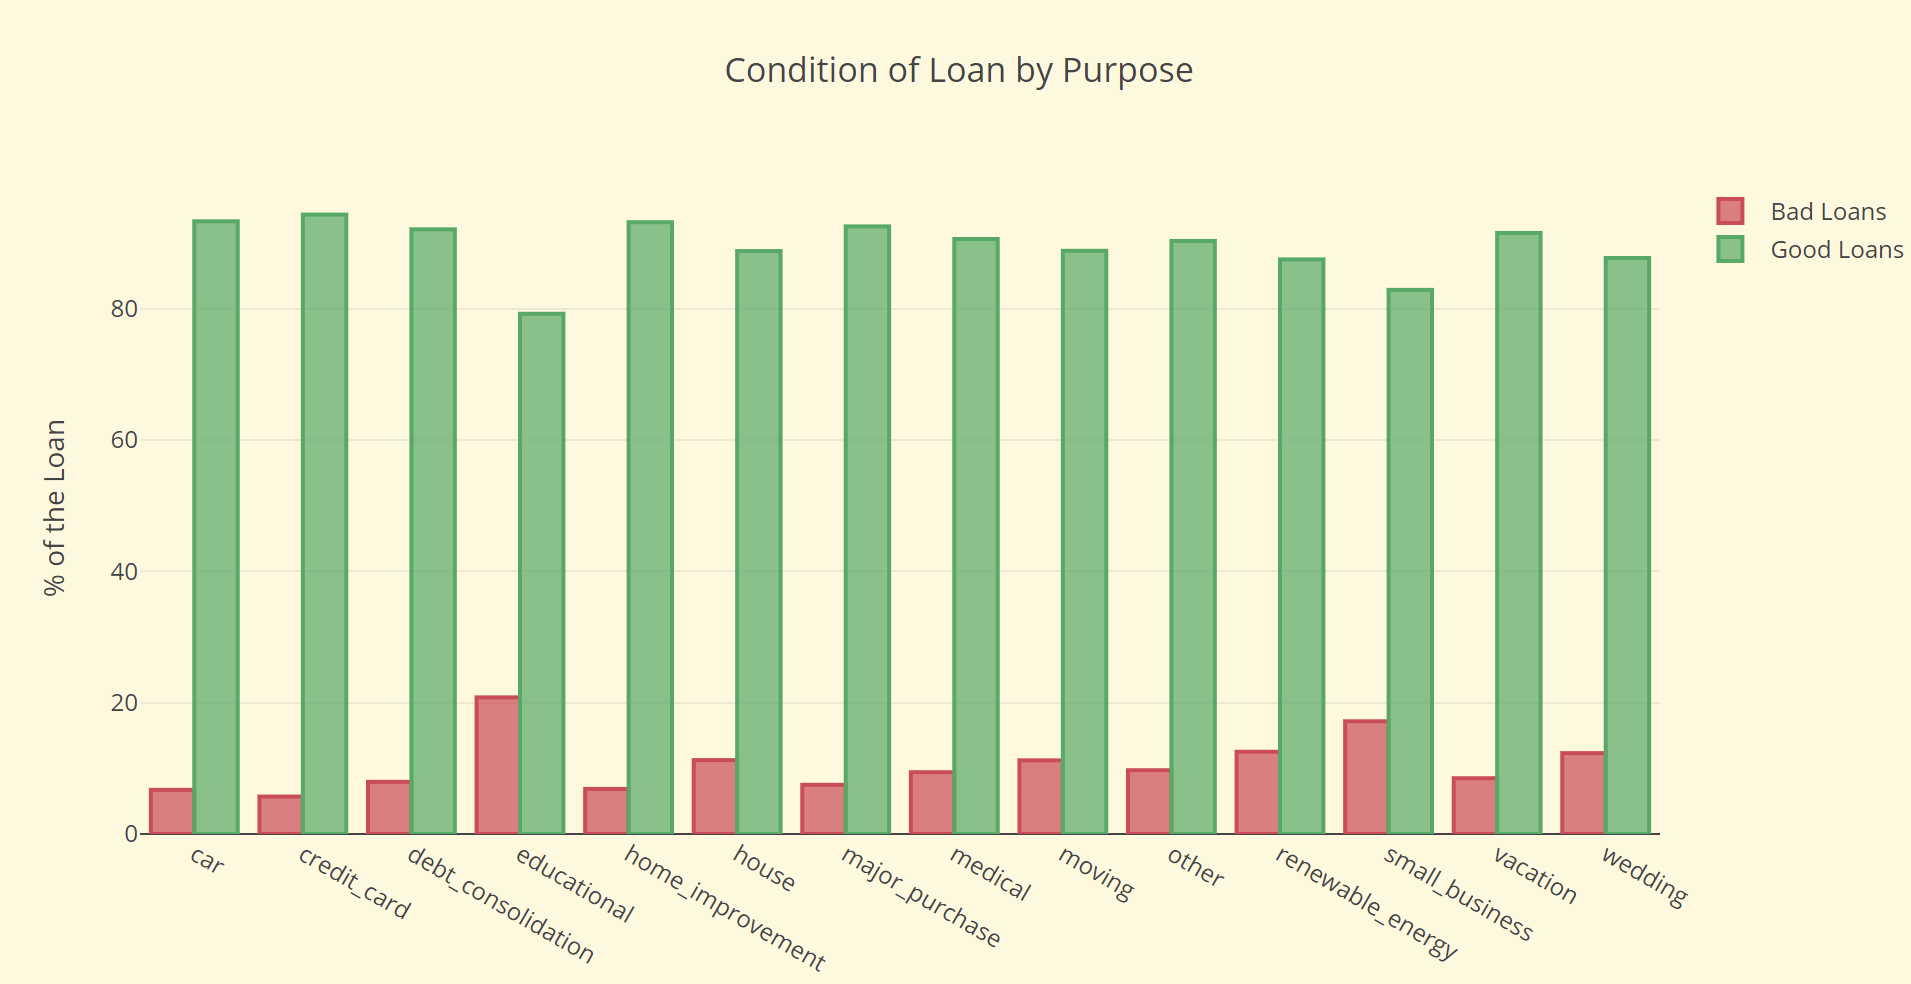

In [81]:
# Average interest by income category and purposes
# Which purpose carries a higher interest rate and does income category have an influence on risk?
# Is LendingClub deploying loan amount where there is a high risk (interest_rate)
# Remember we learned that interest_rates is a key metric in evaluating risk.



group_income_purpose = df.groupby(['income_category', 'purpose'], as_index=False).interest_rate.mean()
group_dti_purpose = df.groupby(['income_category', 'purpose'], as_index=False).loan_amount.mean()
loan_a = group_dti_purpose['loan_amount'].values



# High Car 10.32 15669
new_groupby = group_income_purpose.assign(total_loan_amount=loan_a)
sort_group_income_purpose = new_groupby.sort_values(by="income_category", ascending=True)

In [82]:
loan_count = df.groupby(['income_category', 'purpose'])['loan_condition'].apply(lambda x: x.value_counts())
d={"loan_c": loan_count}
loan_c_df = pd.DataFrame(data=d).reset_index()
loan_c_df = loan_c_df.rename(columns={"level_2": "loan_condition"})


# Good loans & Bad Loans
good_loans = loan_c_df.loc[loan_c_df['loan_condition'] == "Good Loan"].sort_values(by="income_category", ascending=True)
bad_loans = loan_c_df.loc[loan_c_df['loan_condition'] == "Bad Loan"].sort_values(by="income_category", ascending=True)
sort_group_income_purpose['good_loans_count'] = good_loans['loan_c'].values
sort_group_income_purpose['bad_loans_count'] = bad_loans['loan_c'].values
sort_group_income_purpose['total_loans_issued'] = (good_loans['loan_c'].values + bad_loans['loan_c'].values)
sort_group_income_purpose['bad/good ratio (%)'] = np.around(bad_loans['loan_c'].values / (bad_loans['loan_c'].values + good_loans['loan_c'].values), 4) * 100
final_df = sort_group_income_purpose.sort_values(by='income_category', ascending=True)
final_df.style.background_gradient('coolwarm')

,income_category,purpose,interest_rate,total_loan_amount,good_loans_count,bad_loans_count,total_loans_issued,bad/good ratio (%)
0,High,car,10.553239,14655.985915,66,5,71,7.040000
6,High,major_purchase,12.858081,19484.722222,184,14,198,7.070000
1,High,credit_card,11.864134,25375.493631,1469,101,1570,6.430000
2,High,debt_consolidation,13.498637,24972.843264,3569,291,3860,7.540000
4,High,home_improvement,13.104587,23847.384837,964,78,1042,7.490000
5,High,house,15.781000,26588.214286,68,2,70,2.860000
10,High,renewable_energy,15.187500,18725.000000,7,1,8,12.500000
3,High,educational,11.420000,11000.000000,1,1,2,50.000000
8,High,moving,16.211273,19120.909091,51,4,55,7.270000
9,High,other,15.802802,21239.547414,417,47,464,10.130000


In [83]:
final_df = final_df.sort_values(by="purpose", ascending=False)

In [84]:
# Work on a plot to explain better the correlations between the different columns in final_df dataframe.
# We will do a Subplot in Plotly with

# Labels
purpose_labels = df['purpose'].unique()

# Average Interest Rate Dot Plots # 1st Subplot
high_income = final_df['interest_rate'].loc[final_df['income_category'] == 'High'].values.tolist()
medium_income = final_df['interest_rate'].loc[final_df['income_category'] == 'Medium'].values.tolist()
low_income = final_df['interest_rate'].loc[final_df['income_category'] == 'Low'].values.tolist()

high_lst = ['%.2f' % val for val in high_income]
med_lst = ['%.2f' % val for val in medium_income]
low_lst = ['%.2f' % val for val in low_income]



trace1 = {"x": high_lst,
          "y": purpose_labels,
          "marker": {"color": "#0040FF", "size": 16},
          "mode": "markers",
          "name": "High Income",
          "type": "scatter"
}

trace2 = {"x": med_lst,
          "y": purpose_labels,
          "marker": {"color": "#FE9A2E", "size": 16},
          "mode": "markers",
          "name": "Medium Income",
          "type": "scatter",
}

trace3 = {"x": low_lst,
          "y": purpose_labels,
          "marker": {"color": "#FE2E2E", "size": 16},
          "mode": "markers",
          "name": "Low Income",
          "type": "scatter",
}




data = [trace1, trace2, trace3]
layout = {"title": "Average Purpose Interest Rate <br> <i> by Income Category </i> ",
          "xaxis": {"title": "Average Interest Rate", },
          "yaxis": {"title": ""}}

fig = go.Figure(data=data, layout=layout)
iplot(fig)


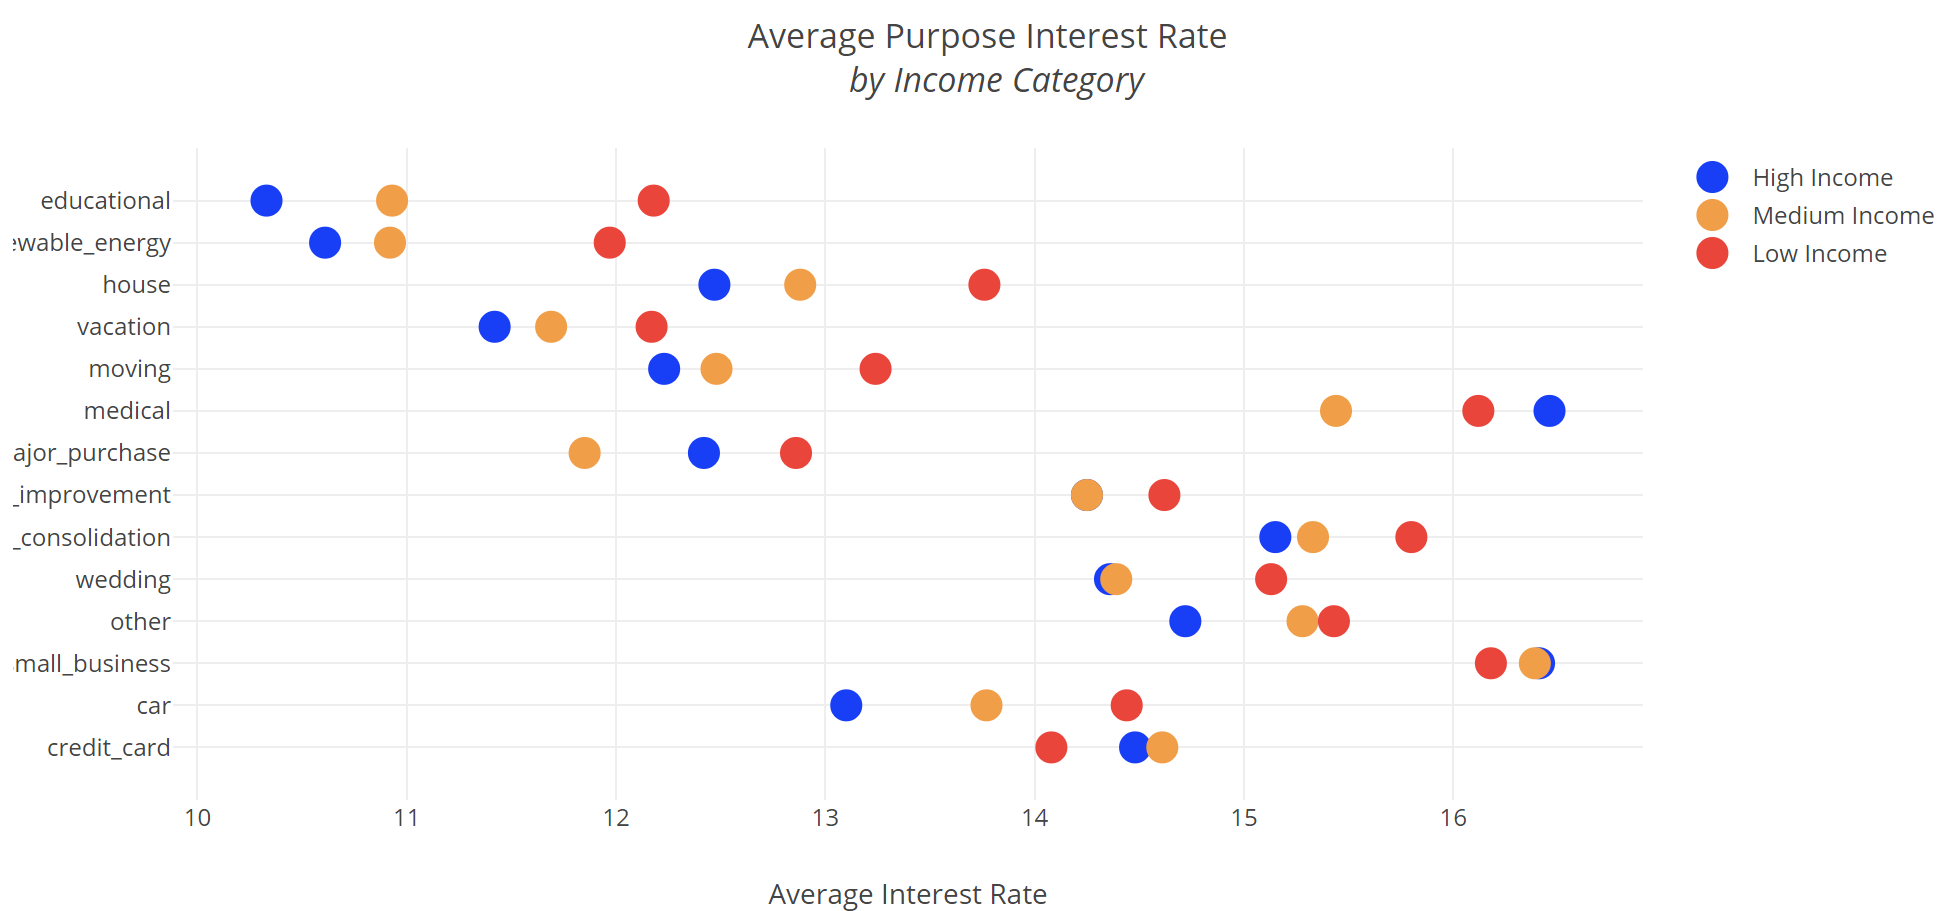

In [85]:
# Labels
purpose_labels = final_df['purpose'].unique()

# Amount of Good and Bad Loans per Purpose (fill by income category)
# Good Loans
good_high_cnt = final_df['good_loans_count'].loc[final_df['income_category'] == "High"].values.tolist()
good_med_cnt = final_df['good_loans_count'].loc[final_df['income_category'] == "Medium"].values.tolist()
good_low_cnt = final_df['good_loans_count'].loc[final_df['income_category'] == "Low"].values.tolist()

# Bad Loans
bad_high_cnt = final_df['bad_loans_count'].loc[final_df['income_category'] == "High"].values.tolist()
bad_med_cnt = final_df['bad_loans_count'].loc[final_df['income_category'] == "Medium"].values.tolist()
bad_low_cnt = final_df['bad_loans_count'].loc[final_df['income_category'] == "Low"].values.tolist()


# Good Loans
trace0 = go.Bar(
    y=purpose_labels,
    x=good_high_cnt,
    legendgroup='a',
    name='High Income',
    orientation='h',
    marker=dict(
        color='#0040FF'
    )
)
trace1 = go.Bar(
    x=good_med_cnt,
    y=purpose_labels,
    legendgroup='a',
    name='Medium Income',
    orientation='h',
    marker=dict(
        color='#FE9A2E',
    )
)

trace2 = go.Bar(
    x=good_low_cnt,
    y=purpose_labels,
    legendgroup='a',
    name='Low Income',
    orientation='h',
    marker=dict(
        color='#FE2E2E',
    )
)

# Bad Loans issued by Income Category
trace3 = go.Bar(
    y=purpose_labels,
    x=bad_high_cnt,
    legendgroup='b',
    showlegend=False,
    name='High Income',
    orientation='h',
    marker=dict(
        color='#0040FF'
    )
)
trace4 = go.Bar(
    x=bad_med_cnt,
    y=purpose_labels,
    legendgroup='b',
    showlegend=False,
    name='Medium Income',
    orientation='h',
    marker=dict(
        color='#FE9A2E',
    )
)

trace5 = go.Bar(
    x=bad_low_cnt,
    y=purpose_labels,
    legendgroup='b',
    showlegend=False,
    name='Low Income',
    orientation='h',
    marker=dict(
        color='#FE2E2E',
    )
)



fig = tools.make_subplots(rows=2, cols=1, print_grid=False,
                         subplot_titles=("Amount of <br> <i>Good Loans Issued</i>",
                                        "Amount of <br> <i>Bad Loans Issued</i>")
                         )

# First Subplot
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 1)

# Second Subplot
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 1)
fig.append_trace(trace5, 2, 1)

fig['layout'].update(height=800, width=800, title='Issuance of Loans', showlegend=True, xaxis=dict(title="Number of Loans Issued"))
iplot(fig, filename='angled-text-bar')

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



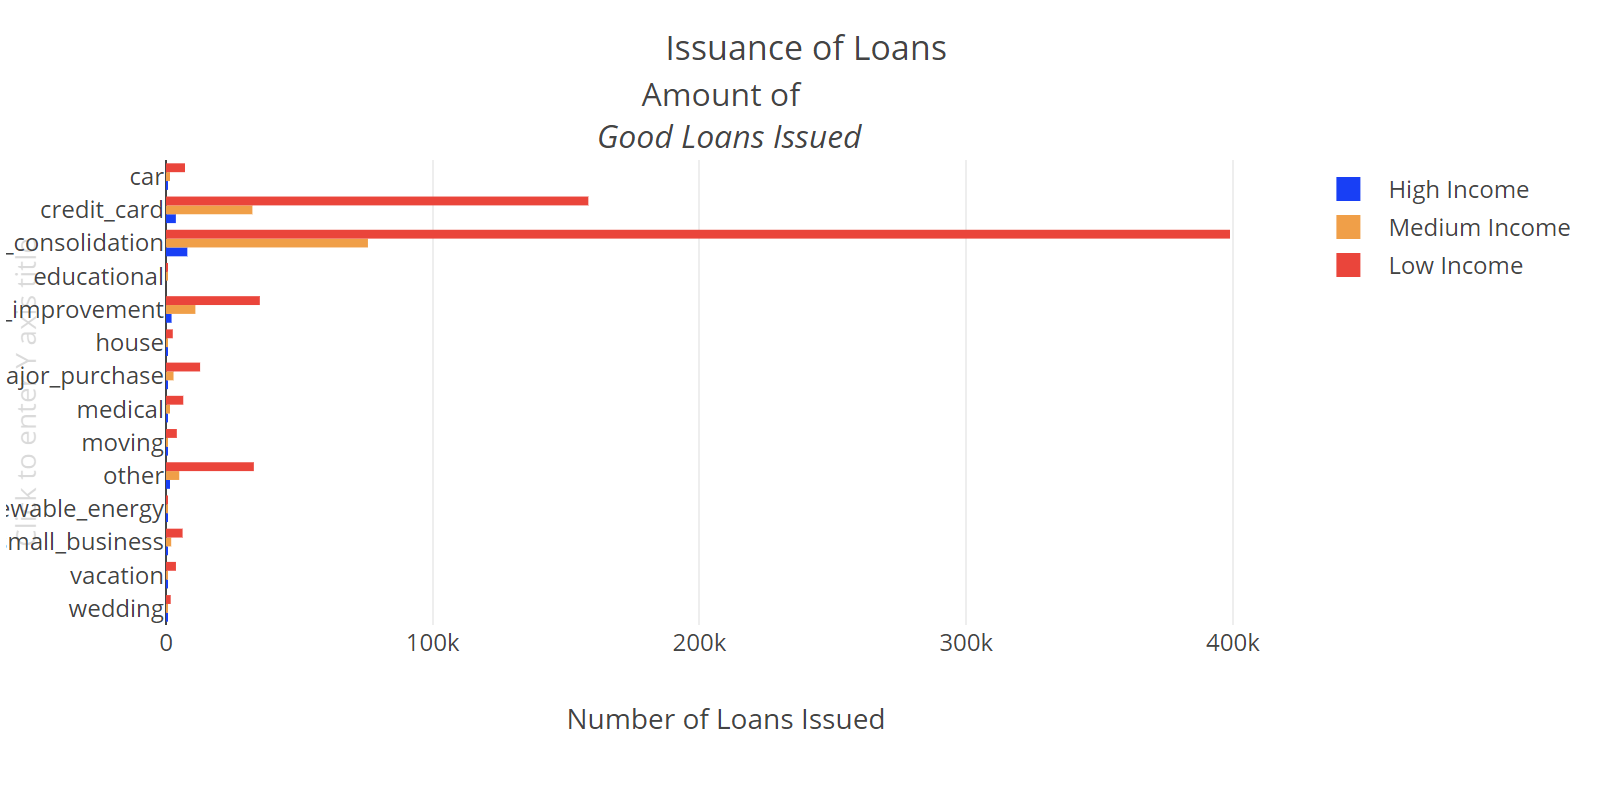

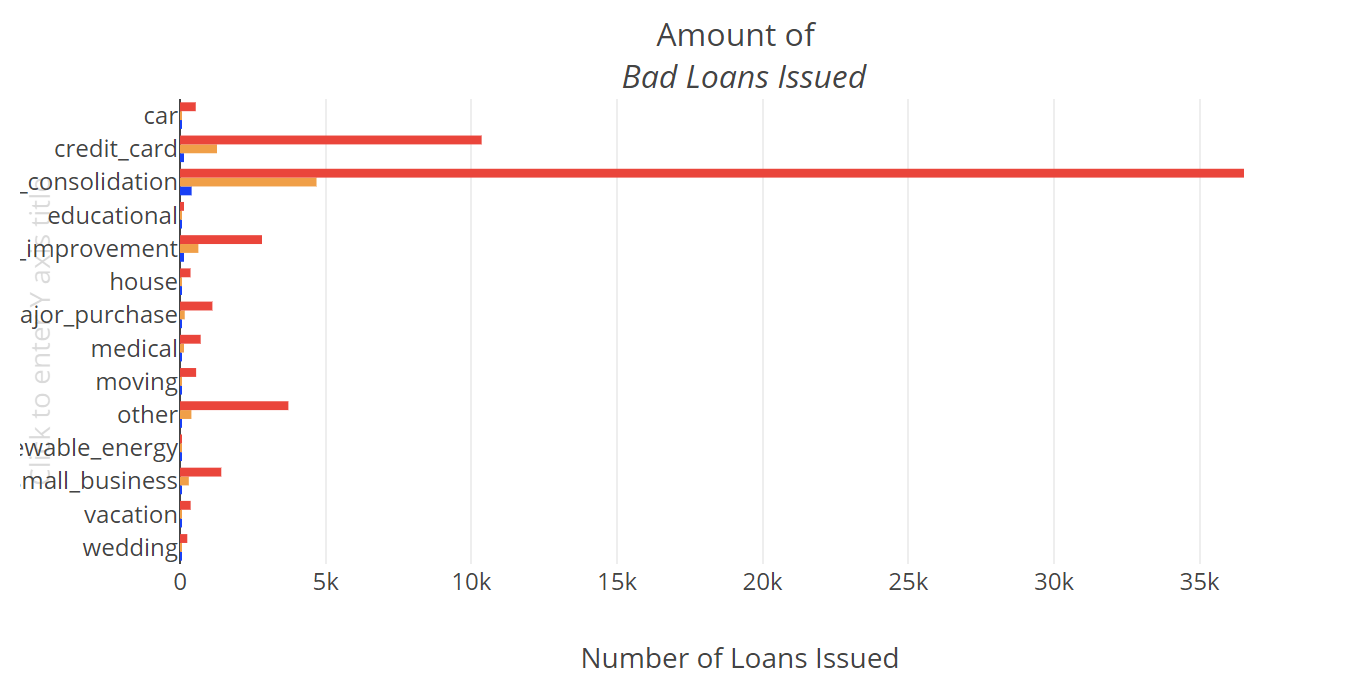